In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/odi_match_wise_cumulated.csv'  # Replace with your actual file path

df = pd.read_csv(file_path)

# Inspect the first few rows to understand the structure of the dataset
print("Dataset Preview:")
print(df.head())



Dataset Preview:
  match_id player_id  player_name    team_name  runs_scored  balls_faced  \
0    64814  91a4a398       Z Khan        India           11           13   
1    64814  2764133a    L Vincent  New Zealand           34           32   
2    64814  b8a55852  BB McCullum  New Zealand            7           12   
3    64814  efc0a862    BF Bowden          NaN            0            0   
4    64814  f5390243  CD McMillan  New Zealand            5            7   

   no_of_fours  no_of_sixes  no_of_catches  runouts  ...  \
0            1            0              1        0  ...   
1            2            0              0        0  ...   
2            0            0              4        1  ...   
3            0            0              0        0  ...   
4            0            0              1        0  ...   

   batsman_average_runs_per_match  batsman_strike_rate  batsman_total_runs  \
0                             0.0                  0.0                   0   
1        

/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/1641768704.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112966 entries, 0 to 112965
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   match_id                        112966 non-null  object 
 1   player_id                       112966 non-null  object 
 2   player_name                     112966 non-null  object 
 3   team_name                       94739 non-null   object 
 4   runs_scored                     112966 non-null  int64  
 5   balls_faced                     112966 non-null  int64  
 6   no_of_fours                     112966 non-null  int64  
 7   no_of_sixes                     112966 non-null  int64  
 8   no_of_catches                   112966 non-null  int64  
 9   runouts                         112966 non-null  int64  
 10  balls_bowled                    112966 non-null  int64  
 11  dot_balls                       112966 non-null  int64  
 12  wickets         

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/odi_match_wise_cumulated.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Define input features (columns 22–33) and target variable
input_features = [
    'batsman_100s', 
    'batsman_50s', 
    'batsman_average_runs_per_match', 
    'batsman_strike_rate', 
    'batsman_total_runs', 
    'bowler_average', 
    'bowler_economy_rate', 
    'bowler_wickets', 
    'fielder_total_catches', 
    'fielder_total_runouts', 
    'total_fours', 
    'total_sixes'
]

target_variable = 'fantasy_points'

# Drop rows with missing values in the input features or target variable
df = df.dropna(subset=input_features + [target_variable])

# Define input (X) and target (y)
X = df[input_features]
y = df[target_variable]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a regression model (e.g., Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
print("Training the model...")
model.fit(X_train, y_train)

# Evaluate training loss
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = np.mean(np.abs(y_train_pred - y_train))
print(f"\nTraining Loss:")
print(f"Mean Squared Error (Training): {train_mse}")
print(f"Mean Absolute Error (Training): {train_mae}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate testing loss
test_mse = mean_squared_error(y_test, y_pred)
test_mae = np.mean(np.abs(y_pred - y_test))
print(f"\nTesting Loss:")
print(f"Mean Squared Error (Testing): {test_mse}")
print(f"Mean Absolute Error (Testing): {test_mae}")

# Calculate Mean Absolute Percentage Error (MAPE)
valid_indices = y_test != 0  # Avoid division by zero
y_test_valid = y_test[valid_indices]
y_pred_valid = y_pred[valid_indices]
percentage_errors = ((y_pred_valid - y_test_valid) / y_test_valid) * 100
mape = np.mean(np.abs(percentage_errors))

# Print evaluation metrics
print("\nModel Evaluation:")
print(f"Mean Squared Error (Testing): {test_mse}")
print(f"R-squared (R2): {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': abs(y_pred - y_test.values),
    'Percentage_Error': ((y_pred - y_test) / y_test) * 100  # Raw percentage error for reference
})
output_file = 'predicted_fantasy_points.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")

# Save the trained model
model_file = 'fantasy_points_model.pkl'
joblib.dump(model, model_file)
print(f"Trained model saved as '{model_file}'")


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/2268509271.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Training the model...

Training Loss:
Mean Squared Error (Training): 312.4099709587596
Mean Absolute Error (Training): 12.200556239006042

Testing Loss:
Mean Squared Error (Testing): 1513.9815058000797
Mean Absolute Error (Testing): 27.996501713182266

Model Evaluation:
Mean Squared Error (Testing): 1513.9815058000797
R-squared (R2): 0.10144768414061067
Mean Absolute Percentage Error (MAPE): 297.63%
Predicted values saved to 'predicted_fantasy_points.csv'
Trained model saved as 'fantasy_points_model.pkl'


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/269719899.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Training the model...

Final Testing Loss:
Mean Squared Error (Testing): 1434.0301388781572
R-squared (R2): 0.14889904707245338


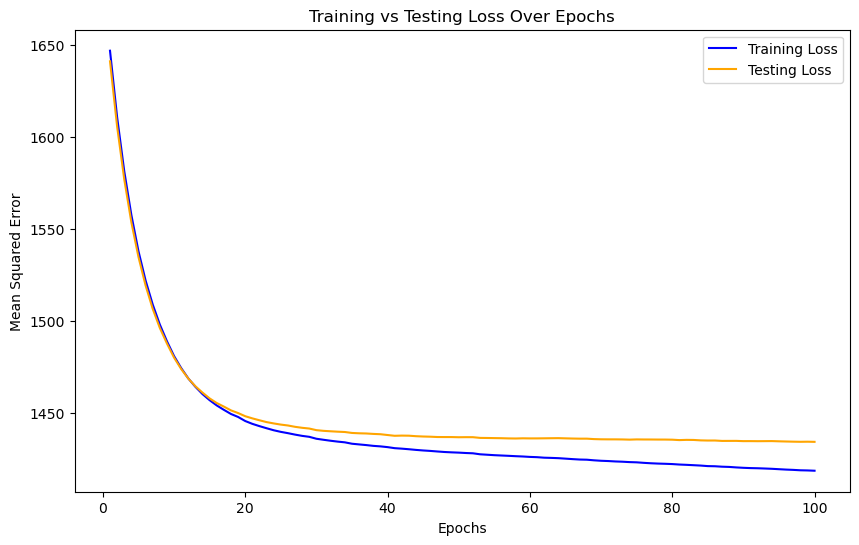

Predicted values saved to 'predicted_fantasy_points.csv'


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/odi_match_wise_cumulated.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Define input features (columns 22–33) and target variable
input_features = [
    'batsman_100s', 
    'batsman_50s', 
    'batsman_average_runs_per_match', 
    'batsman_strike_rate', 
    'batsman_total_runs', 
    'bowler_average', 
    'bowler_economy_rate', 
    'bowler_wickets', 
    'fielder_total_catches', 
    'fielder_total_runouts', 
    'total_fours', 
    'total_sixes'
]

target_variable = 'fantasy_points'

# Drop rows with missing values in the input features or target variable
df = df.dropna(subset=input_features + [target_variable])

# Define input (X) and target (y)
X = df[input_features]
y = df[target_variable]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Gradient Boosting Regressor with staged predictions to track training progress
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model while tracking loss at each stage
print("Training the model...")
model.fit(X_train, y_train)

# Track staged predictions for training and testing sets
train_loss = []
test_loss = []
for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_loss.append(mean_squared_error(y_train, y_train_pred))
    test_loss.append(mean_squared_error(y_test, y_test_pred))

# Final model evaluation
y_pred = model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print(f"\nFinal Testing Loss:")
print(f"Mean Squared Error (Testing): {final_mse}")
print(f"R-squared (R2): {final_r2}")

# Plot Training vs Testing Loss Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': abs(y_pred - y_test.values),
    'Percentage_Error': ((y_pred - y_test) / y_test) * 100  # Raw percentage error for reference
})
output_file = 'predicted_fantasy_points.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")


In [9]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 27.743439000620356


In [10]:
# Final model evaluation
y_pred = model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE

print(f"\nFinal Testing Loss:")
print(f"Mean Squared Error (Testing): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Error (MAE): {mae}")



Final Testing Loss:
Mean Squared Error (Testing): 1434.0301388781572
R-squared (R2): 0.14889904707245338
Mean Absolute Error (MAE): 27.743439000620356


In [13]:
# Final model evaluation
y_pred = model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

# Filter out zero values in actual fantasy points to avoid division by zero
non_zero_indices = y_test != 0  # Create a boolean mask for non-zero actual values
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]

# Calculate percentage absolute errors
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(percentage_errors)

# Print evaluation metrics
print(f"\nFinal Testing Loss:")
print(f"Mean Squared Error (Testing): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Final Testing Loss:
Mean Squared Error (Testing): 1434.0301388781572
R-squared (R2): 0.14889904707245338
Mean Absolute Percentage Error (MAPE): 308.10%


Training the model...

Final Testing Loss:
Mean Squared Error (Testing): 1434.0222484976132
R-squared (R2): 0.1489037300356757
Mean Absolute Error (MAE): 27.743230059929495
Mean Absolute Percentage Error (MAPE): 308.10%


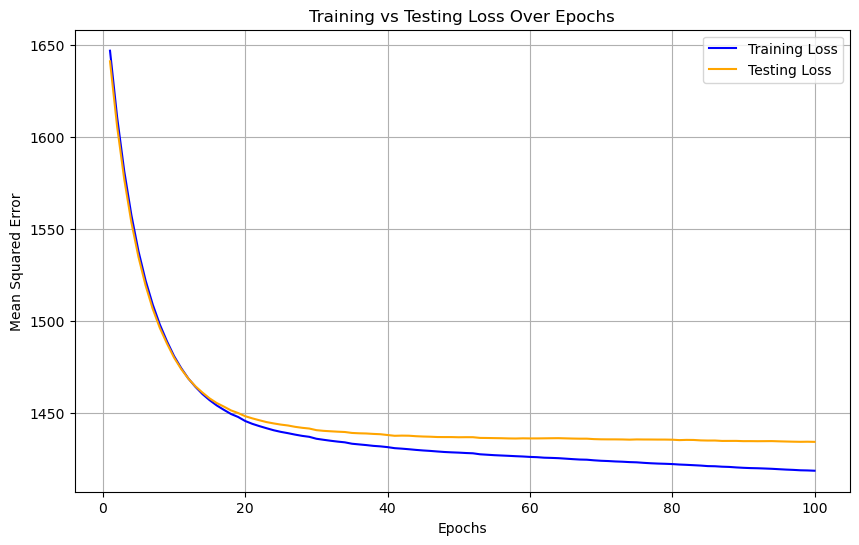

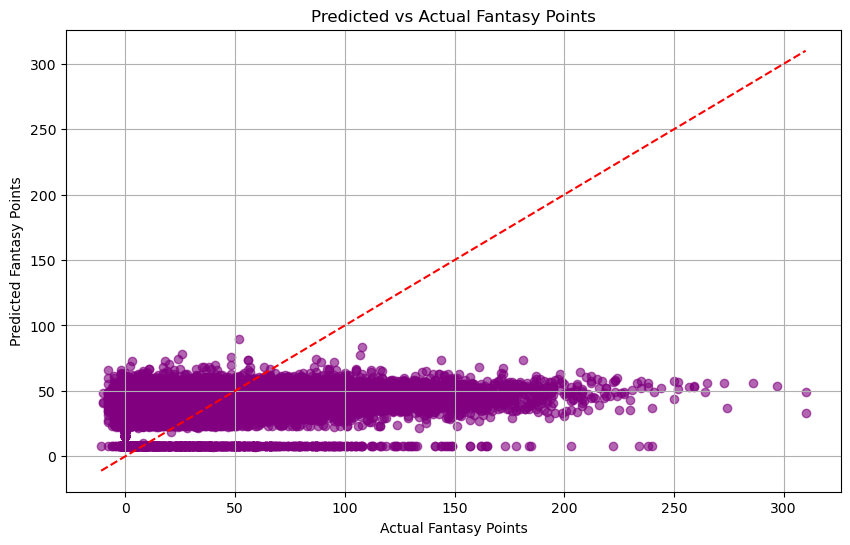

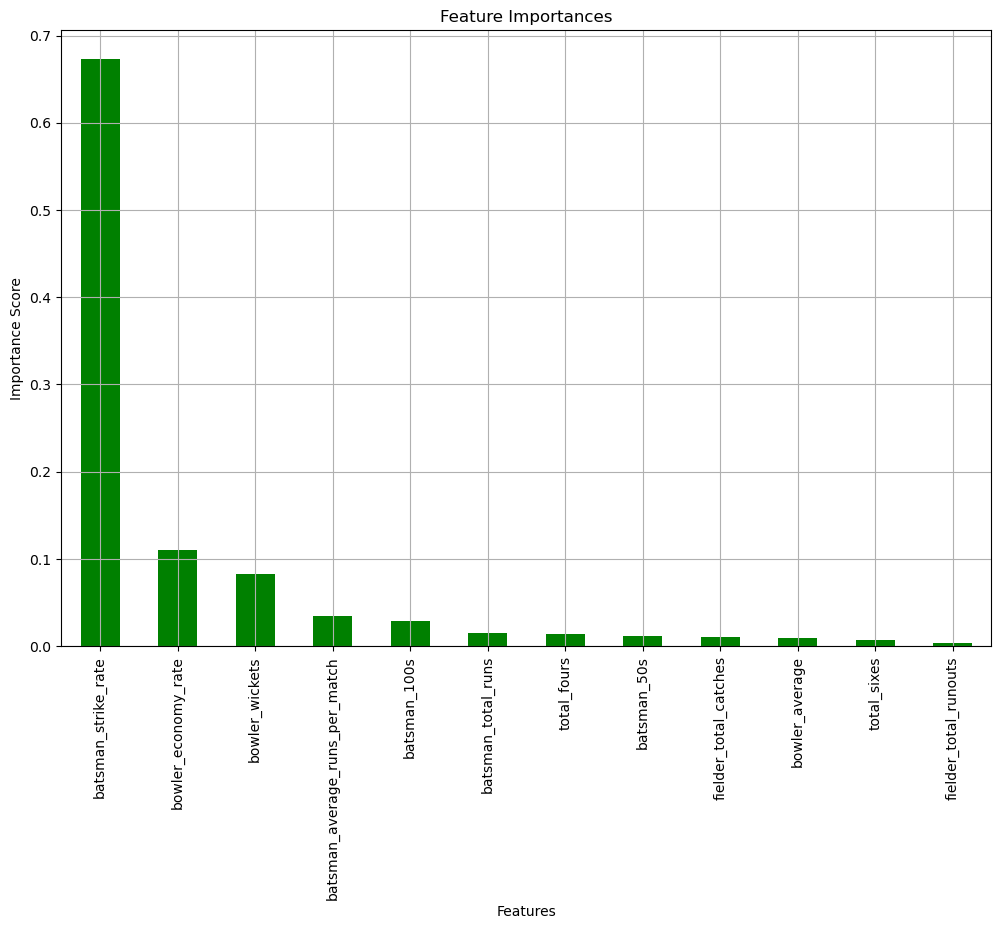

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply the scaler
scaler = StandardScaler()  # or MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model while tracking loss at each stage
print("Training the model...")
model.fit(X_train_scaled, y_train)

# Track staged predictions for training and testing sets
train_loss = []
test_loss = []
for y_train_pred, y_test_pred in zip(model.staged_predict(X_train_scaled), model.staged_predict(X_test_scaled)):
    train_loss.append(mean_squared_error(y_train, y_train_pred))
    test_loss.append(mean_squared_error(y_test, y_test_pred))

# Final model evaluation
y_pred = model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate percentage absolute errors and MAPE
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print(f"\nFinal Testing Loss:")
print(f"Mean Squared Error (Testing): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot Training vs Testing Loss Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# Predicted vs Actual Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title('Predicted vs Actual Fantasy Points')
plt.xlabel('Actual Fantasy Points')
plt.ylabel('Predicted Fantasy Points')
plt.grid()
plt.show()

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=input_features).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar', color='green')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.grid()
plt.show()


CAREER + RECENT FORM

In [16]:
import pandas as pd

# Load the two CSV files
file1_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/optimized_recent_form_odi.csv'
file2_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/odi_match_wise_cumulated.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/426237664.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1_path)
/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/426237664.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file2_path)


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112966 entries, 0 to 112965
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   match_id                   112966 non-null  object 
 1   player_id                  112966 non-null  object 
 2   player_name                112966 non-null  object 
 3   team_name                  94739 non-null   object 
 4   runs_scored                112966 non-null  int64  
 5   balls_faced                112966 non-null  int64  
 6   no_of_fours                112966 non-null  int64  
 7   no_of_sixes                112966 non-null  int64  
 8   no_of_catches              112966 non-null  int64  
 9   runouts                    112966 non-null  int64  
 10  balls_bowled               112966 non-null  int64  
 11  dot_balls                  112966 non-null  int64  
 12  wickets                    112966 non-null  int64  
 13  LBWs/Bowled                11

In [22]:
df1.shape[0]

112966

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112966 entries, 0 to 112965
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   match_id                        112966 non-null  object 
 1   player_id                       112966 non-null  object 
 2   player_name                     112966 non-null  object 
 3   team_name                       94739 non-null   object 
 4   runs_scored                     112966 non-null  int64  
 5   balls_faced                     112966 non-null  int64  
 6   no_of_fours                     112966 non-null  int64  
 7   no_of_sixes                     112966 non-null  int64  
 8   no_of_catches                   112966 non-null  int64  
 9   runouts                         112966 non-null  int64  
 10  balls_bowled                    112966 non-null  int64  
 11  dot_balls                       112966 non-null  int64  
 12  wickets         

In [5]:
import pandas as pd

# Load the two CSV files
file1_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/optimized_recent_form_odi.csv'
file2_path = '/Users/chaitanyatandon/Desktop/DREAM_11_v2/Dream-11/Code/Sohit/odi_match_wise_cumulated.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Merge the dataframes on 'match_id' and 'player_id'
merged_df = pd.merge(df1, df2, on=['match_id', 'player_id'], how='inner')  # Use 'inner', 'left', 'right', or 'outer'

# Display the first few rows of the merged dataframe
print(merged_df.head())

  match_id player_id player_name_x  team_name_x  runs_scored_x  balls_faced_x  \
0    64814  91a4a398        Z Khan        India             11             13   
1    64814  2764133a     L Vincent  New Zealand             34             32   
2    64814  b8a55852   BB McCullum  New Zealand              7             12   
3    64814  efc0a862     BF Bowden          NaN              0              0   
4    64814  f5390243   CD McMillan  New Zealand              5              7   

   no_of_fours_x  no_of_sixes_x  no_of_catches_x  runouts_x  ...  \
0              1              0                1          0  ...   
1              2              0                0          0  ...   
2              0              0                4          1  ...   
3              0              0                0          0  ...   
4              0              0                1          0  ...   

   batsman_average_runs_per_match  batsman_strike_rate  batsman_total_runs  \
0                         

In [21]:
merged_df.shape[0]

112966

In [24]:
columns_list = list(merged_df.columns)
print(columns_list)


['match_id', 'player_id', 'player_name_x', 'team_name_x', 'runs_scored_x', 'balls_faced_x', 'no_of_fours_x', 'no_of_sixes_x', 'no_of_catches_x', 'runouts_x', 'balls_bowled_x', 'dot_balls_x', 'wickets_x', 'LBWs/Bowled_x', 'runs_conceded_x', 'stumpings_x', 'out_x', 'date_x', 'venue_x', 'match_type_x', 'gender_x', 'fantasy_points_x', 'recent_total_runs_odi', 'recent_average_odi', 'recent_strike_rate_odi', 'recent_4s_odi', 'recent_6s_odi', 'recent_50s_odi', 'recent_100s_odi', 'recent_economy_rate_odi', 'recent_bowler_average_odi', 'recent_total_wickets_odi', 'recent_total_catches_odi', 'recent_runouts_odi', 'player_name_y', 'team_name_y', 'runs_scored_y', 'balls_faced_y', 'no_of_fours_y', 'no_of_sixes_y', 'no_of_catches_y', 'runouts_y', 'balls_bowled_y', 'dot_balls_y', 'wickets_y', 'LBWs/Bowled_y', 'runs_conceded_y', 'stumpings_y', 'out_y', 'date_y', 'venue_y', 'match_type_y', 'gender_y', 'fantasy_points_y', 'batsman_100s', 'batsman_50s', 'batsman_average_runs_per_match', 'batsman_strike_r

In [26]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
print(df.columns)


Index(['match_id', 'player_id', 'player_name_x', 'team_name_x',
       'runs_scored_x', 'balls_faced_x', 'no_of_fours_x', 'no_of_sixes_x',
       'no_of_catches_x', 'runouts_x', 'balls_bowled_x', 'dot_balls_x',
       'wickets_x', 'LBWs/Bowled_x', 'runs_conceded_x', 'stumpings_x', 'out_x',
       'date_x', 'venue_x', 'match_type_x', 'gender_x', 'fantasy_points_x',
       'recent_total_runs_odi', 'recent_average_odi', 'recent_strike_rate_odi',
       'recent_4s_odi', 'recent_6s_odi', 'recent_50s_odi', 'recent_100s_odi',
       'recent_economy_rate_odi', 'recent_bowler_average_odi',
       'recent_total_wickets_odi', 'recent_total_catches_odi',
       'recent_runouts_odi', 'player_name_y', 'team_name_y', 'runs_scored_y',
       'balls_faced_y', 'no_of_fours_y', 'no_of_sixes_y', 'no_of_catches_y',
       'runouts_y', 'balls_bowled_y', 'dot_balls_y', 'wickets_y',
       'LBWs/Bowled_y', 'runs_conceded_y', 'stumpings_y', 'out_y', 'date_y',
       'venue_y', 'match_type_y', 'gender_y', 'fant

Training the model...

Model Evaluation:
Mean Squared Error (MSE): 1419.9905327856443
R-squared (R2): 0.1572315930909164
Mean Absolute Error (MAE): 27.500157862293612
Mean Absolute Percentage Error (MAPE): 307.51%


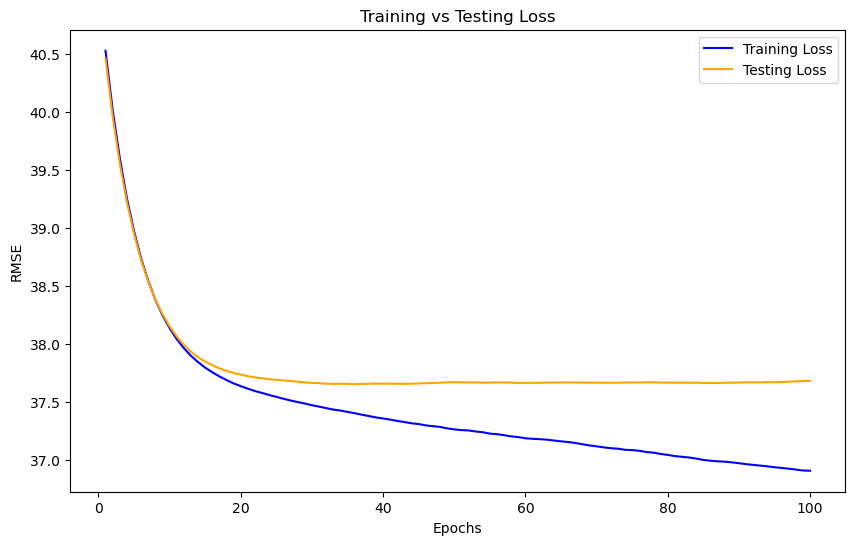

Predicted values saved to 'predicted_fantasy_points.csv'


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Load the dataset
df=merged_df

# Define input features and target variable
input_features = [
    'batsman_100s', 'batsman_50s', 'batsman_average_runs_per_match', 'batsman_strike_rate',
    'batsman_total_runs', 'bowler_average', 'bowler_economy_rate', 'bowler_wickets',
    'fielder_total_catches', 'fielder_total_runouts', 'total_fours', 'total_sixes',
    'recent_total_runs_odi', 'recent_average_odi', 'recent_strike_rate_odi', 'recent_4s_odi',
    'recent_6s_odi', 'recent_50s_odi', 'recent_100s_odi', 'recent_economy_rate_odi',
    'recent_bowler_average_odi', 'recent_total_wickets_odi', 'recent_total_catches_odi', 'recent_runouts_odi'
]

target_variable = 'fantasy_points_x'

# Drop rows with missing values in input or target features
df = df.dropna(subset=input_features + [target_variable])

# Define input (X) and target (y)
X = df[input_features]
y = df[target_variable]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='rmse')
print("Training the model...")
model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=False
)

# Track training and testing losses
evals_result = model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot Training vs Testing Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': abs(y_pred - y_test.values),
    'Percentage_Error': ((y_pred - y_test) / y_test) * 100  # Raw percentage error for reference
})
output_file = 'predicted_fantasy_points.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")


In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'max_depth': [3, 5, 7],                    # Maximum tree depth
    'min_child_weight': [1, 3, 5],             # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 1.0],                   # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],            # Fraction of features used for each tree
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform Grid Search
print("Starting Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Train the best model on the entire training dataset
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print(f"\nFinal Testing Metrics with Best Model:")
print(f"Mean Squared Error (Testing): {final_mse}")
print(f"R-squared (R2): {final_r2}")


Starting Grid Search...
Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, s

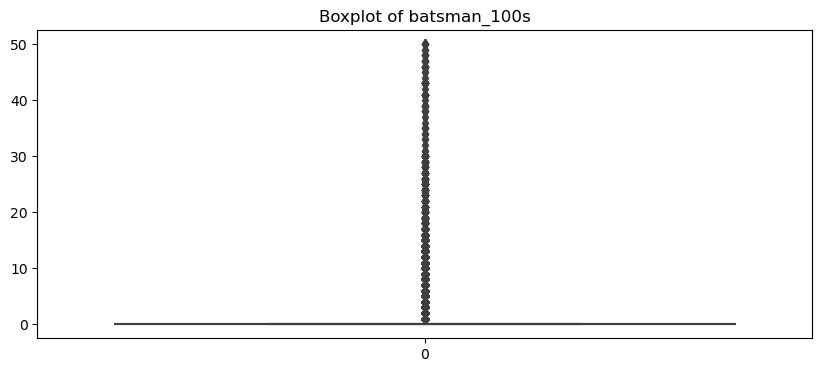

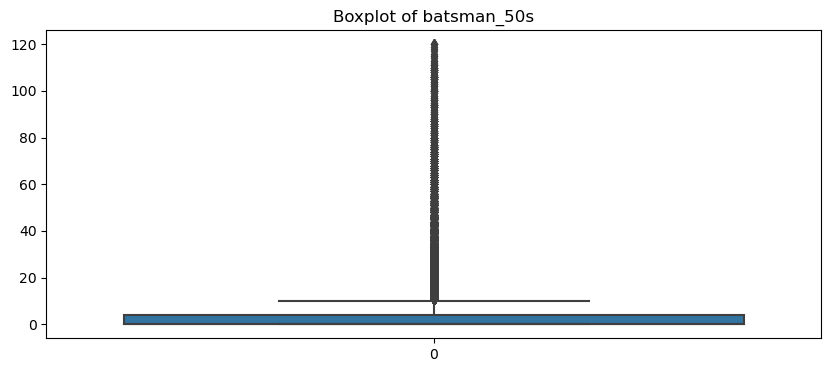

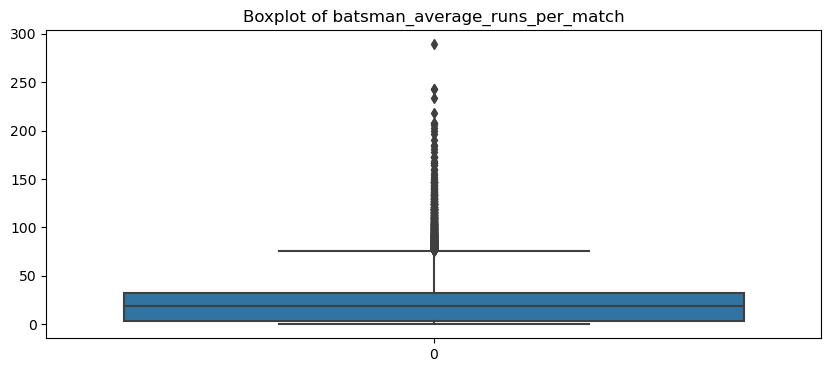

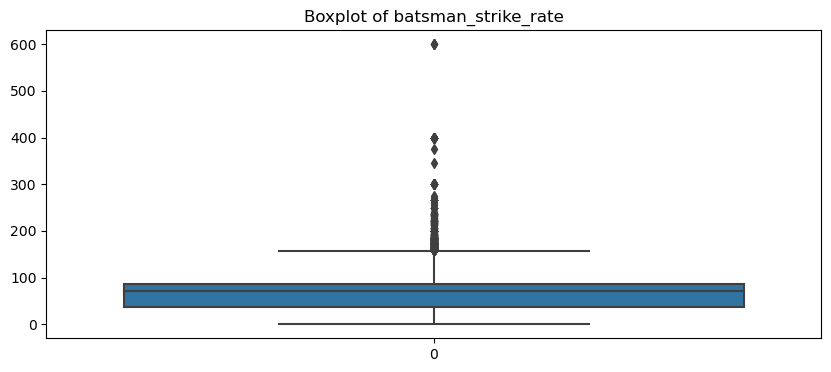

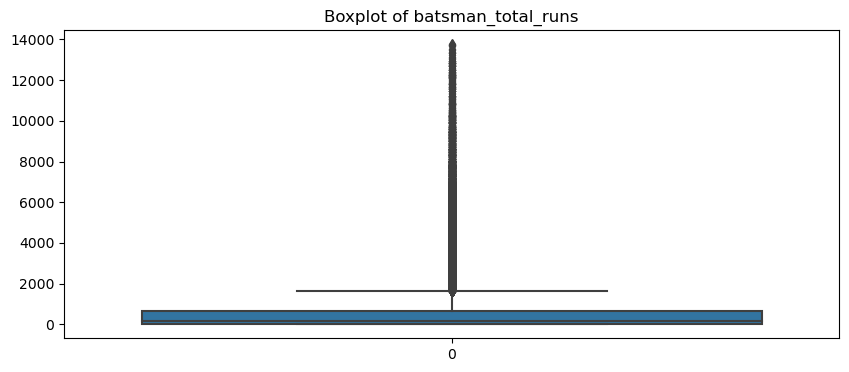

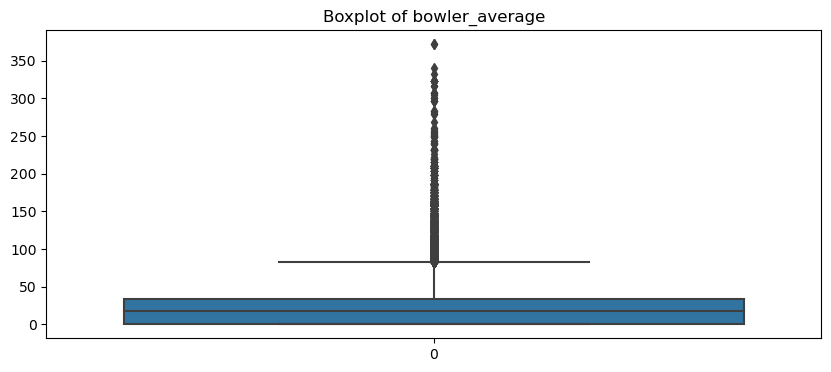

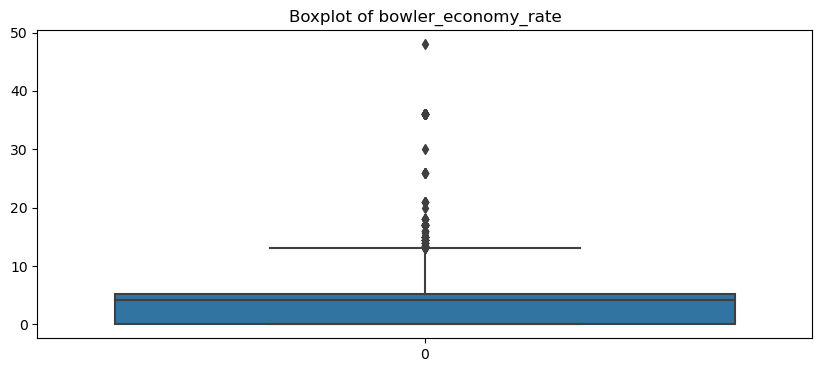

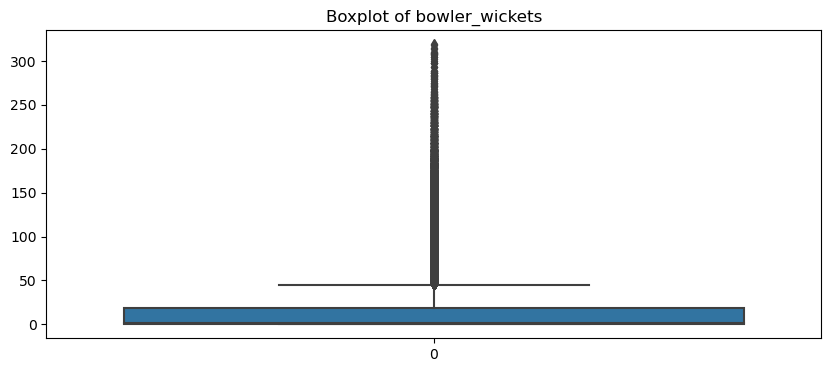

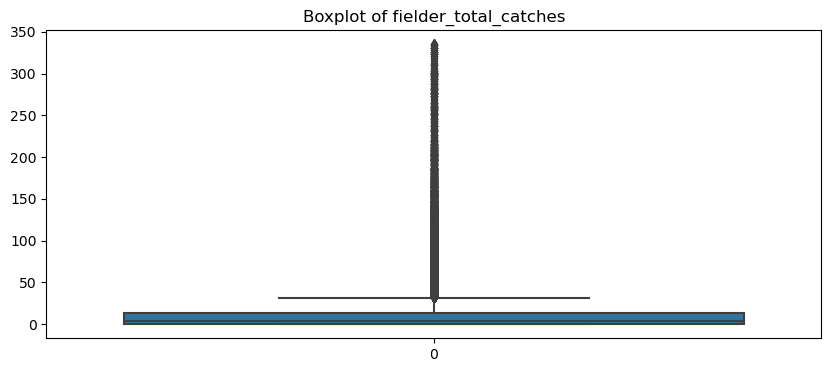

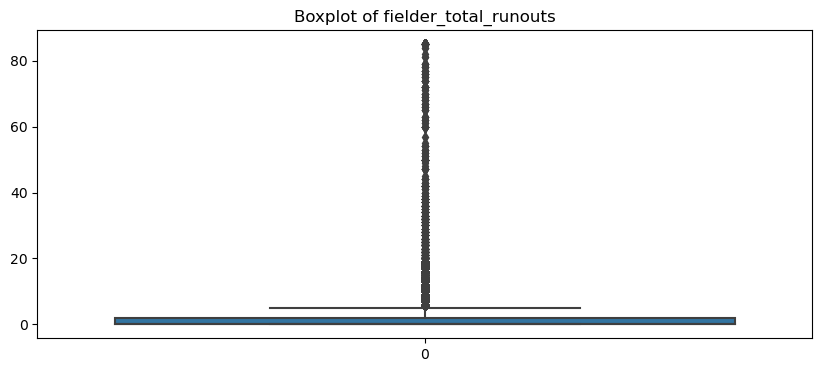

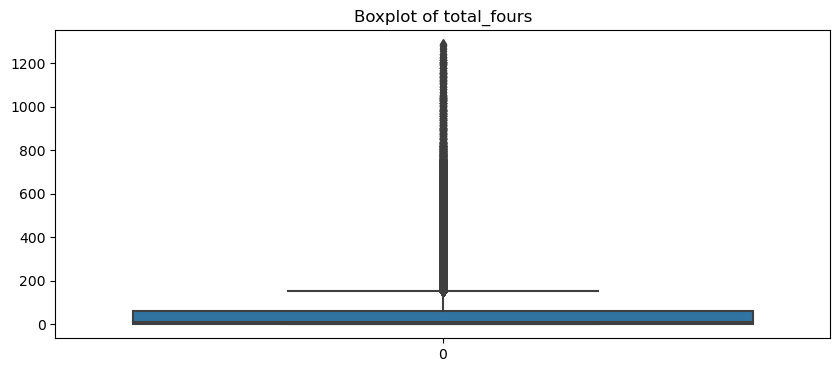

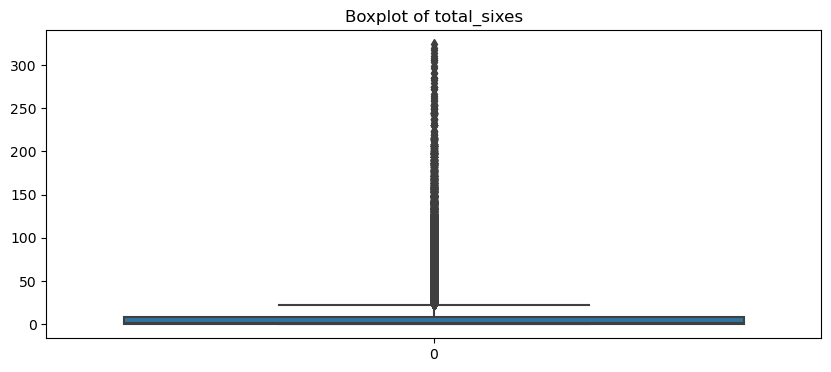

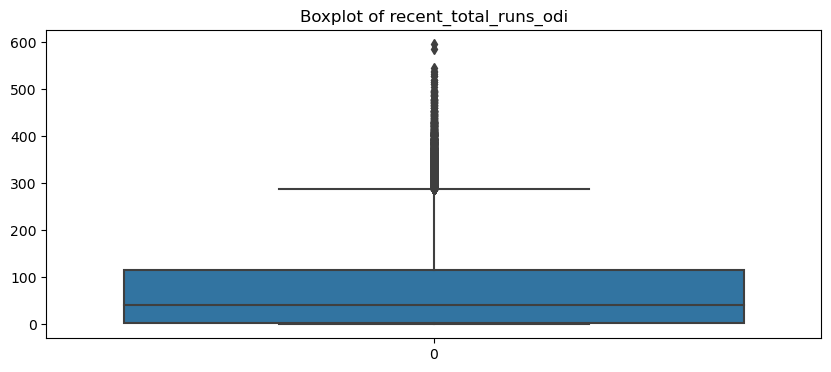

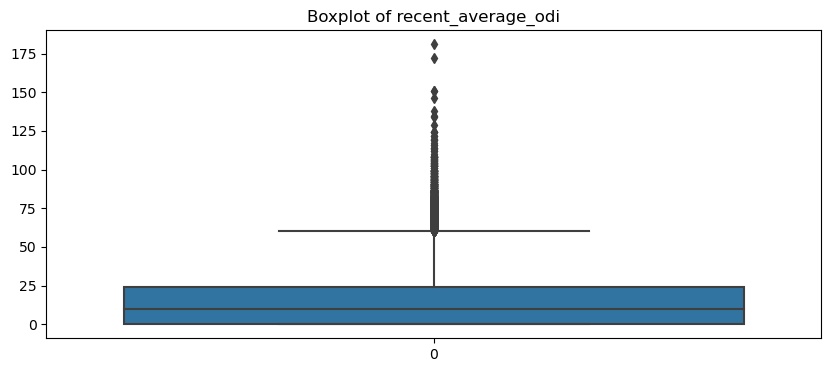

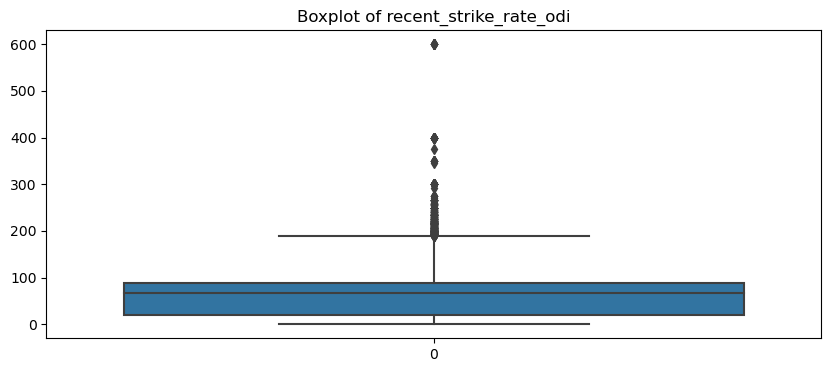

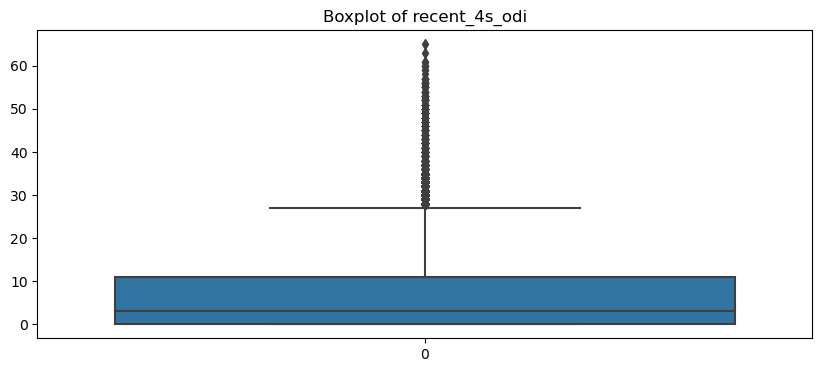

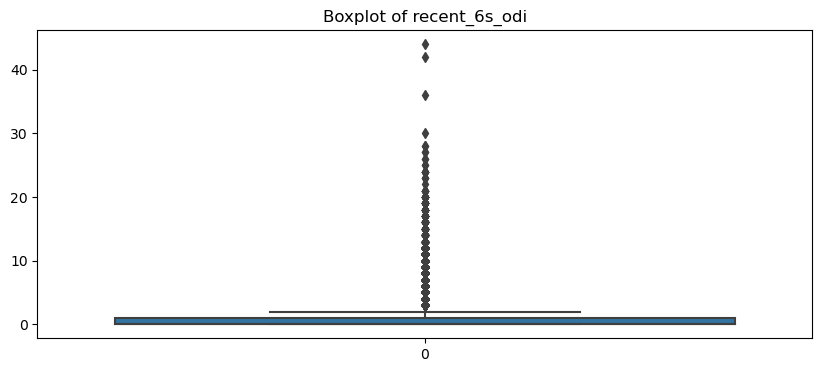

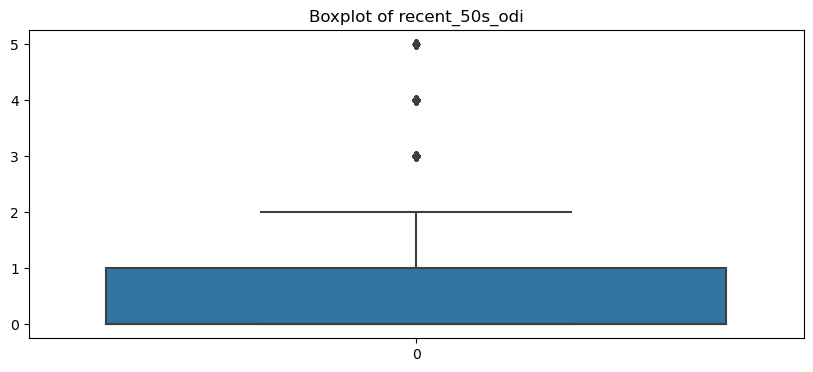

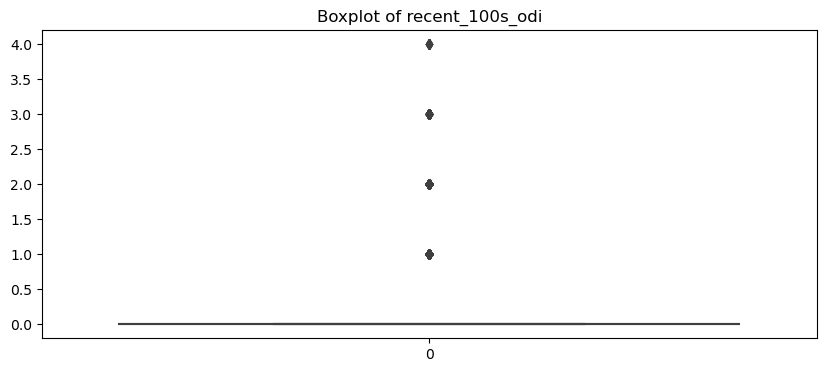

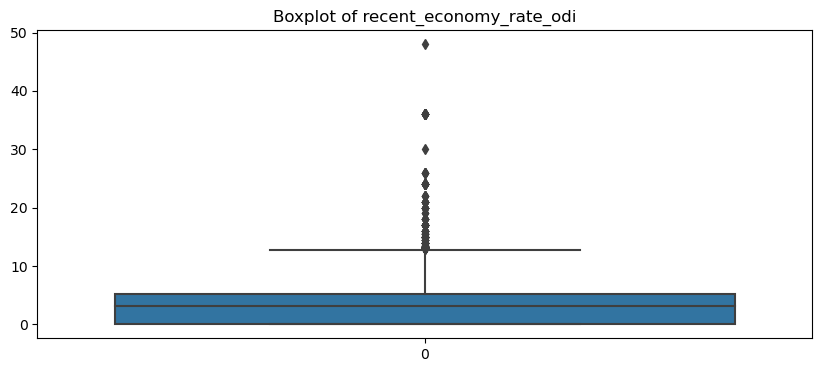

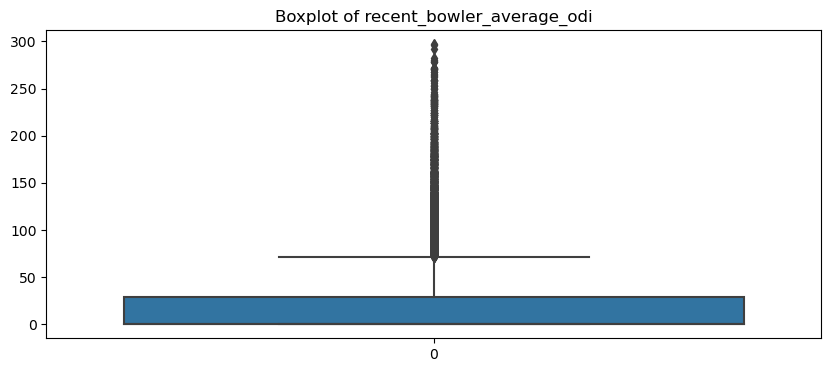

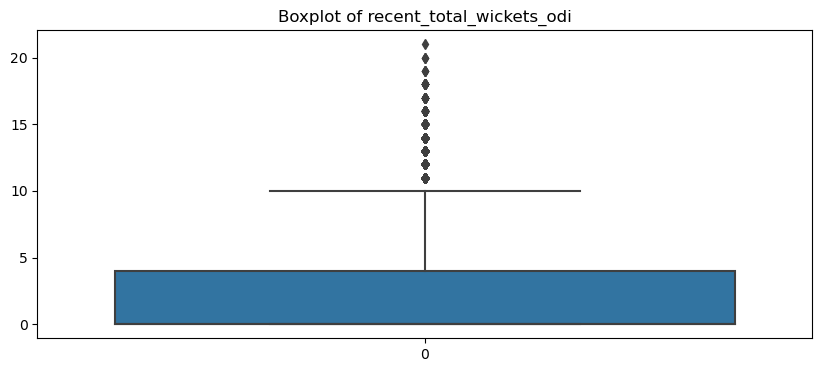

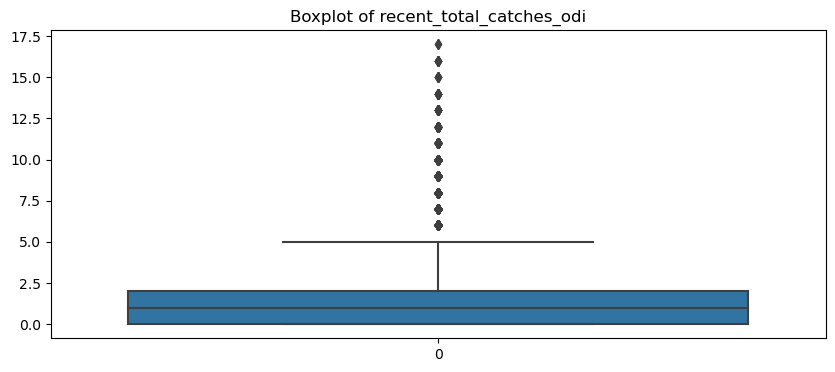

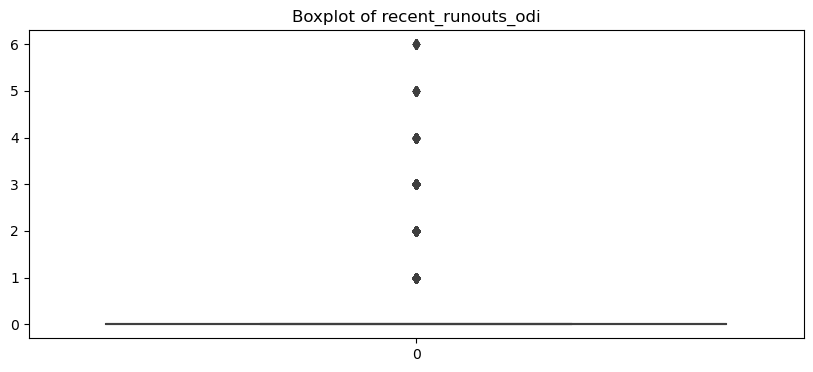

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize potential outliers for each feature
for feature in input_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


In [32]:
importances = pd.Series(model.feature_importances_, index=input_features).sort_values(ascending=False)
print(importances)


batsman_total_runs                0.501227
batsman_strike_rate               0.084020
bowler_economy_rate               0.048958
recent_total_wickets_odi          0.043210
batsman_100s                      0.037629
bowler_wickets                    0.028514
recent_average_odi                0.025392
batsman_50s                       0.024425
recent_economy_rate_odi           0.023063
total_fours                       0.021873
recent_total_runs_odi             0.019147
recent_4s_odi                     0.017501
batsman_average_runs_per_match    0.017199
recent_bowler_average_odi         0.014390
total_sixes                       0.013322
fielder_total_catches             0.010308
recent_50s_odi                    0.009981
recent_strike_rate_odi            0.009612
recent_total_catches_odi          0.009126
recent_6s_odi                     0.008921
bowler_average                    0.008552
recent_100s_odi                   0.008205
recent_runouts_odi                0.008080
fielder_tot

Training the model with selected features...
[0]	validation_0-rmse:40.56318	validation_1-rmse:40.49288
[1]	validation_0-rmse:40.11798	validation_1-rmse:40.05128
[2]	validation_0-rmse:39.73223	validation_1-rmse:39.67622
[3]	validation_0-rmse:39.40178	validation_1-rmse:39.35268
[4]	validation_0-rmse:39.13150	validation_1-rmse:39.08733
[5]	validation_0-rmse:38.90704	validation_1-rmse:38.87181
[6]	validation_0-rmse:38.71622	validation_1-rmse:38.68537
[7]	validation_0-rmse:38.56438	validation_1-rmse:38.53853
[8]	validation_0-rmse:38.43435	validation_1-rmse:38.41328
[9]	validation_0-rmse:38.32644	validation_1-rmse:38.31252
[10]	validation_0-rmse:38.23171	validation_1-rmse:38.22209
[11]	validation_0-rmse:38.15611	validation_1-rmse:38.15307
[12]	validation_0-rmse:38.09150	validation_1-rmse:38.09182
[13]	validation_0-rmse:38.03723	validation_1-rmse:38.04215
[14]	validation_0-rmse:37.98655	validation_1-rmse:37.99253
[15]	validation_0-rmse:37.94401	validation_1-rmse:37.95448
[16]	validation_0-rms

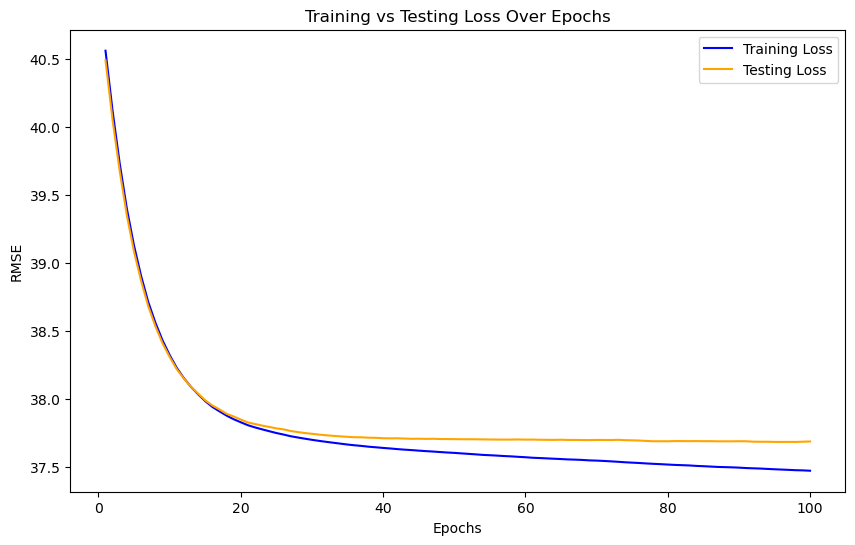

Predicted values saved to 'predicted_fantasy_points_best_model.csv'


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


# Define input features and target variable
input_features = [
    'batsman_100s', 'batsman_50s', 'batsman_average_runs_per_match', 'batsman_strike_rate',
    'batsman_total_runs', 'bowler_average', 'bowler_economy_rate', 'bowler_wickets',
    'fielder_total_catches', 'fielder_total_runouts', 'total_fours', 'total_sixes',
    'recent_total_runs_odi', 'recent_average_odi', 'recent_strike_rate_odi', 'recent_4s_odi',
    'recent_6s_odi', 'recent_50s_odi', 'recent_100s_odi', 'recent_economy_rate_odi',
    'recent_bowler_average_odi', 'recent_total_wickets_odi', 'recent_total_catches_odi', 'recent_runouts_odi'
]

target_variable = 'fantasy_points_x'

# Drop rows with missing values in input features or target variable
df = df.dropna(subset=input_features + [target_variable])

# Define input (X) and target (y)
X = df[input_features]
y = df[target_variable]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor with the best parameters
best_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42,
    eval_metric='rmse'  # Ensure the evaluation metric is specified
)

# Train the model without early stopping
print("Training the model with selected features...")
best_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],  # Train and test sets
    verbose=True  # Print training progress
)

# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print("\nFinal Testing Metrics with Best Parameters:")
print(f"Mean Squared Error (MSE): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot Training vs Testing Loss
evals_result = best_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': abs(y_pred - y_test.values),
    'Percentage_Error': ((y_pred - y_test) / y_test) * 100  # Raw percentage error for reference
})
output_file = 'predicted_fantasy_points_best_model.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")


Training the model with selected features...
[0]	validation_0-rmse:40.56318	validation_1-rmse:40.49288
[1]	validation_0-rmse:40.11798	validation_1-rmse:40.05128
[2]	validation_0-rmse:39.73223	validation_1-rmse:39.67622
[3]	validation_0-rmse:39.40178	validation_1-rmse:39.35268
[4]	validation_0-rmse:39.13150	validation_1-rmse:39.08733
[5]	validation_0-rmse:38.90704	validation_1-rmse:38.87181
[6]	validation_0-rmse:38.71622	validation_1-rmse:38.68537
[7]	validation_0-rmse:38.56438	validation_1-rmse:38.53853
[8]	validation_0-rmse:38.43435	validation_1-rmse:38.41328
[9]	validation_0-rmse:38.32644	validation_1-rmse:38.31252
[10]	validation_0-rmse:38.23171	validation_1-rmse:38.22209
[11]	validation_0-rmse:38.15611	validation_1-rmse:38.15307
[12]	validation_0-rmse:38.09150	validation_1-rmse:38.09182
[13]	validation_0-rmse:38.03723	validation_1-rmse:38.04215
[14]	validation_0-rmse:37.98655	validation_1-rmse:37.99253
[15]	validation_0-rmse:37.94401	validation_1-rmse:37.95448
[16]	validation_0-rms

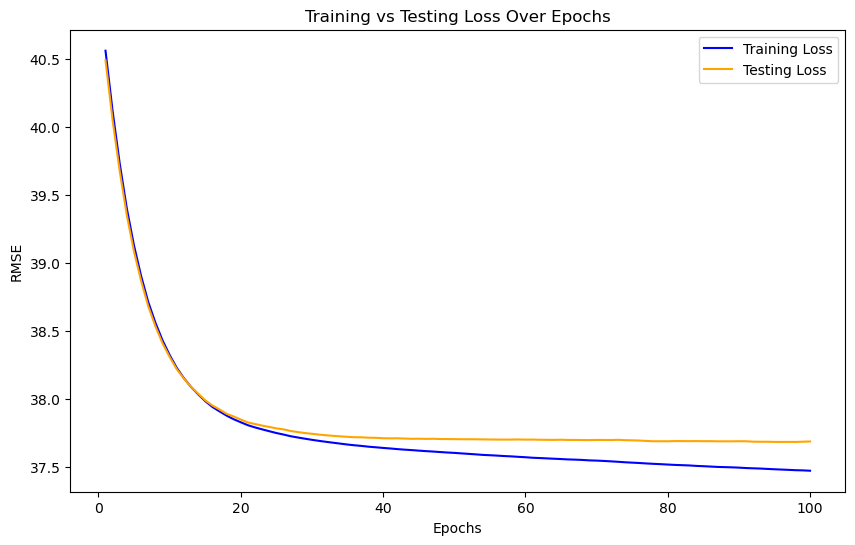

ValueError: array length 22594 does not match index length 17776

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


# Define input features and target variable
input_features = [
    'batsman_100s', 'batsman_50s', 'batsman_average_runs_per_match', 'batsman_strike_rate',
    'batsman_total_runs', 'bowler_average', 'bowler_economy_rate', 'bowler_wickets',
    'fielder_total_catches', 'fielder_total_runouts', 'total_fours', 'total_sixes',
    'recent_total_runs_odi', 'recent_average_odi', 'recent_strike_rate_odi', 'recent_4s_odi',
    'recent_6s_odi', 'recent_50s_odi', 'recent_100s_odi', 'recent_economy_rate_odi',
    'recent_bowler_average_odi', 'recent_total_wickets_odi', 'recent_total_catches_odi', 'recent_runouts_odi'
]

target_variable = 'fantasy_points_x'

# Drop rows with missing values in input features or target variable
df = df.dropna(subset=input_features + [target_variable])

# Define input (X) and target (y)
X = df[input_features]
y = df[target_variable]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor with the best parameters
best_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42,
    eval_metric='rmse'  # Ensure the evaluation metric is specified
)

# Train the model without early stopping
print("Training the model with selected features...")
best_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],  # Train and test sets
    verbose=True  # Print training progress
)

# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100  # Always positive
mape = np.mean(percentage_errors)  # Mean of positive percentage errors

# Print evaluation metrics
print("\nFinal Testing Metrics with Best Parameters:")
print(f"Mean Squared Error (MSE): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot Training vs Testing Loss
evals_result = best_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': np.abs(y_pred - y_test.values),  # Ensure positive
    'Percentage_Error': percentage_errors  # Percentage error for each valid sample
})
output_file = 'predicted_fantasy_points_best_model.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")


In [43]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")


Length of y_test: 22594
Length of y_pred: 22594


In [44]:
print(f"Length of y_test_non_zero: {len(y_test_non_zero)}")
print(f"Length of y_pred_non_zero: {len(y_pred_non_zero)}")


Length of y_test_non_zero: 17776
Length of y_pred_non_zero: 17776


In [45]:
print(f"Length of y_test.values: {len(y_test.values)}")
print(f"Length of percentage_errors: {len(percentage_errors)}")


Length of y_test.values: 22594
Length of percentage_errors: 17776


Training the model with selected features...
[0]	validation_0-rmse:40.56318	validation_1-rmse:40.49288
[1]	validation_0-rmse:40.11798	validation_1-rmse:40.05128
[2]	validation_0-rmse:39.73223	validation_1-rmse:39.67622
[3]	validation_0-rmse:39.40178	validation_1-rmse:39.35268
[4]	validation_0-rmse:39.13150	validation_1-rmse:39.08733
[5]	validation_0-rmse:38.90704	validation_1-rmse:38.87181
[6]	validation_0-rmse:38.71622	validation_1-rmse:38.68537
[7]	validation_0-rmse:38.56438	validation_1-rmse:38.53853
[8]	validation_0-rmse:38.43435	validation_1-rmse:38.41328
[9]	validation_0-rmse:38.32644	validation_1-rmse:38.31252
[10]	validation_0-rmse:38.23171	validation_1-rmse:38.22209
[11]	validation_0-rmse:38.15611	validation_1-rmse:38.15307
[12]	validation_0-rmse:38.09150	validation_1-rmse:38.09182
[13]	validation_0-rmse:38.03723	validation_1-rmse:38.04215
[14]	validation_0-rmse:37.98655	validation_1-rmse:37.99253
[15]	validation_0-rmse:37.94401	validation_1-rmse:37.95448
[16]	validation_0-rms

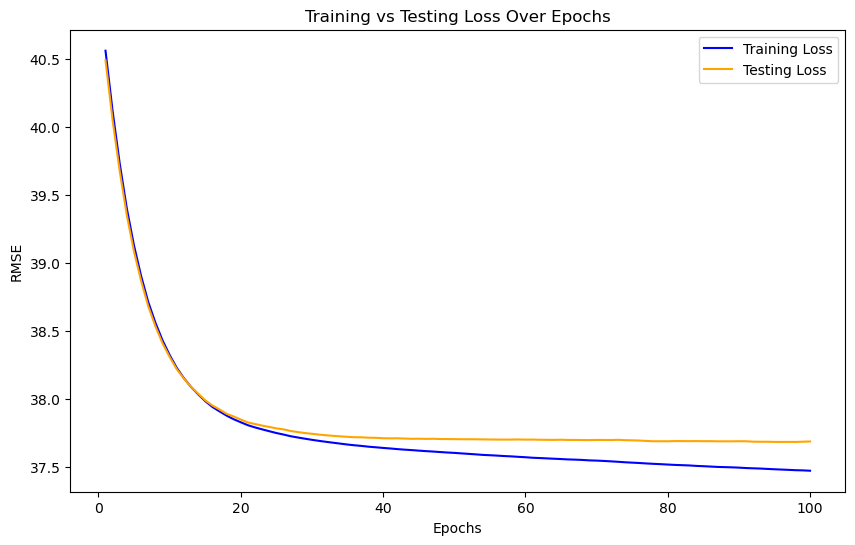

Predicted values saved to 'predicted_fantasy_points_best_model.csv'


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/1537025202.py:95: RuntimeWarning: divide by zero encountered in divide
  'Percentage_Error': np.abs((y_test.values - y_pred) / y_test.values) * 100  # Raw percentage error


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


# Define input features and target variable
input_features = [
    'batsman_100s', 'batsman_50s', 'batsman_average_runs_per_match', 'batsman_strike_rate',
    'batsman_total_runs', 'bowler_average', 'bowler_economy_rate', 'bowler_wickets',
    'fielder_total_catches', 'fielder_total_runouts', 'total_fours', 'total_sixes',
    'recent_total_runs_odi', 'recent_average_odi', 'recent_strike_rate_odi', 'recent_4s_odi',
    'recent_6s_odi', 'recent_50s_odi', 'recent_100s_odi', 'recent_economy_rate_odi',
    'recent_bowler_average_odi', 'recent_total_wickets_odi', 'recent_total_catches_odi', 'recent_runouts_odi'
]
target_variable = 'fantasy_points_x'

# Drop rows with missing values in input features or target variable
df = df.dropna(subset=input_features + [target_variable])

# Define input (X) and target (y)
X = df[input_features]
y = df[target_variable]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor with the best parameters
best_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42,
    eval_metric='rmse'
)

# Train the model without early stopping
print("Training the model with selected features...")
best_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=True
)

# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print("\nFinal Testing Metrics with Best Parameters:")
print(f"Mean Squared Error (MSE): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot Training vs Testing Loss
evals_result = best_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': np.abs(y_pred - y_test.values),
    'Percentage_Error': np.abs((y_test.values - y_pred) / y_test.values) * 100  # Raw percentage error
})
output_file = 'predicted_fantasy_points_best_model.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/525802434.py:5: RuntimeWarning: divide by zero encountered in divide
  percentage_errors = np.abs((y_test.values - y_pred) / y_test.values) * 100  # Percentage errors


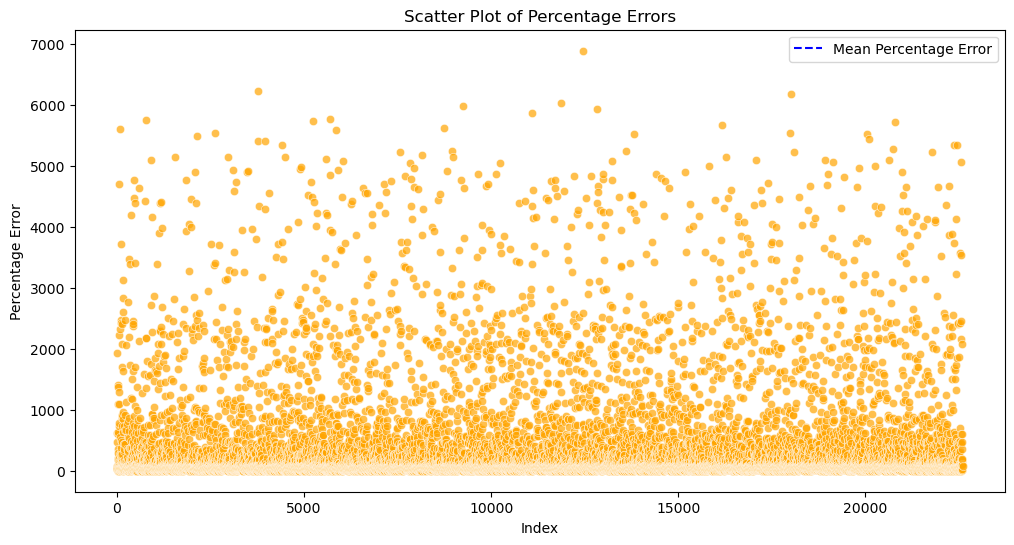

Average Percentage Error after Removing Outliers: nan%


/Users/chaitanyatandon/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/chaitanyatandon/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:2881: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std
/Users/chaitanyatandon/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chaitanyatandon/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [48]:
import seaborn as sns
from scipy.stats import zscore

# Calculate percentage errors
percentage_errors = np.abs((y_test.values - y_pred) / y_test.values) * 100  # Percentage errors

# Create a scatter plot of percentage errors
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(percentage_errors)), y=percentage_errors, alpha=0.7, color='orange')
plt.axhline(np.mean(percentage_errors), color='blue', linestyle='--', label='Mean Percentage Error')
plt.title('Scatter Plot of Percentage Errors')
plt.xlabel('Index')
plt.ylabel('Percentage Error')
plt.legend()
plt.show()

# Remove outliers based on z-scores
z_scores = zscore(percentage_errors)
filtered_errors = percentage_errors[np.abs(z_scores) < 3]  # Keep errors within 3 standard deviations

# Calculate and print average percentage error after removing outliers
filtered_mean_percentage_error = np.mean(filtered_errors)
print(f"Average Percentage Error after Removing Outliers: {filtered_mean_percentage_error:.2f}%")



Feature Importance:
                           Feature  Importance
4               batsman_total_runs    0.355055
12           recent_total_runs_odi    0.262780
3              batsman_strike_rate    0.072210
19         recent_economy_rate_odi    0.047922
6              bowler_economy_rate    0.038744
0                     batsman_100s    0.030314
7                   bowler_wickets    0.026393
1                      batsman_50s    0.024003
21        recent_total_wickets_odi    0.022642
2   batsman_average_runs_per_match    0.017284
13              recent_average_odi    0.016436
11                     total_sixes    0.011885
15                   recent_4s_odi    0.011840
14          recent_strike_rate_odi    0.009995
10                     total_fours    0.009695
8            fielder_total_catches    0.007496
20       recent_bowler_average_odi    0.006444
22        recent_total_catches_odi    0.005526
5                   bowler_average    0.004521
9            fielder_total_runouts    0

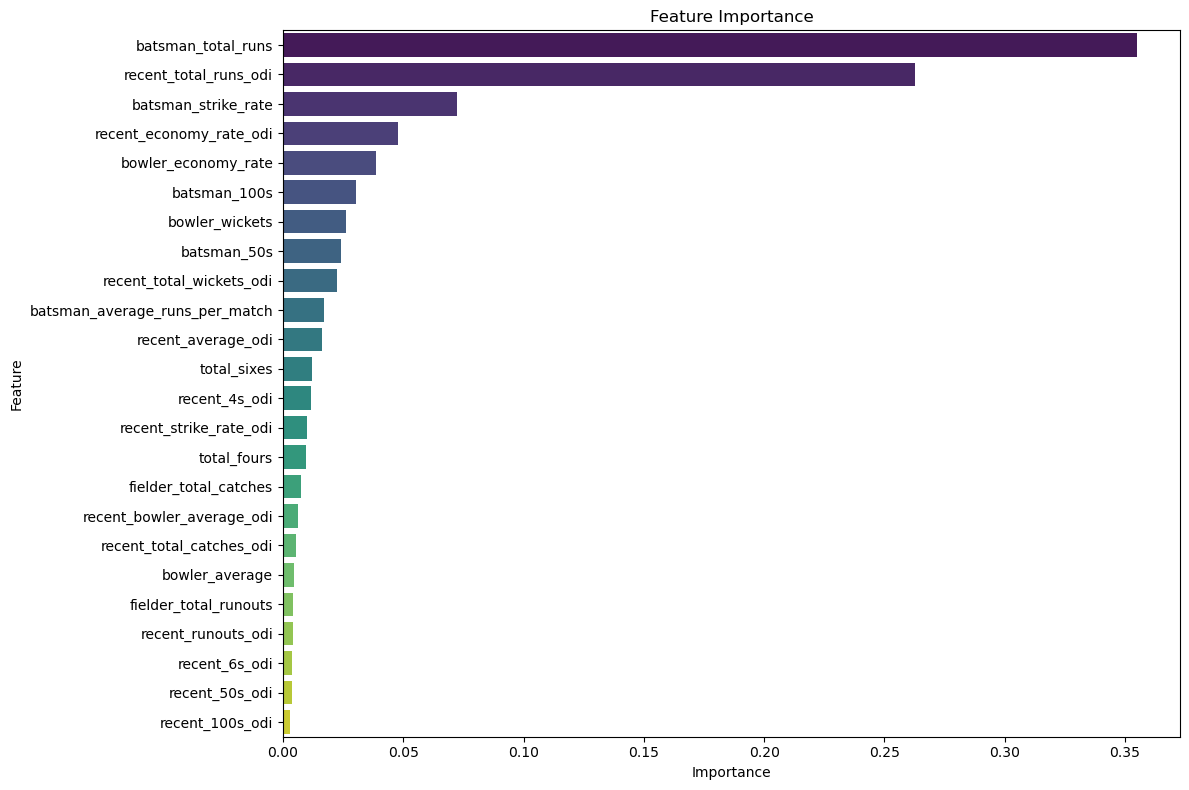

In [49]:
# Get feature importances from the model
feature_importances = best_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': input_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/3035601326.py:13: RuntimeWarning: divide by zero encountered in divide
  error_categories = pd.cut((absolute_errors / y_test.values) * 100, bins=bins, labels=error_ranges)



Error Distribution Table:
  Error Range  Count  Percentage
0       0-10%   1355    5.997167
1      10-20%   1443    6.386651
2      20-30%   1543    6.829247
3      30-40%   1540    6.815969
4      40-50%   1589    7.032841
5     50-100%   4830   21.377357
6       >100%   9598   42.480305


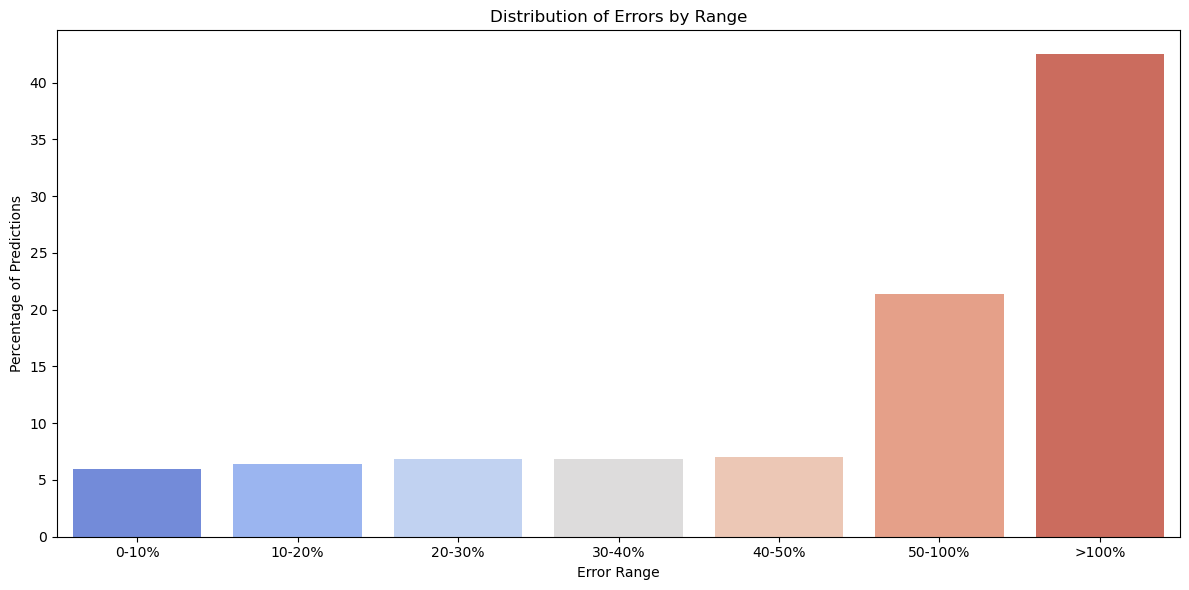

In [50]:
import seaborn as sns

# Calculate absolute errors
absolute_errors = np.abs(y_pred - y_test.values)

# Define error ranges
error_ranges = [
    "0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-100%", ">100%"
]
bins = [0, 10, 20, 30, 40, 50, 100, np.inf]

# Assign errors to ranges
error_categories = pd.cut((absolute_errors / y_test.values) * 100, bins=bins, labels=error_ranges)

# Create a DataFrame for the error distribution
error_distribution = error_categories.value_counts().sort_index()

# Print the distribution as a table
error_table = pd.DataFrame({
    "Error Range": error_distribution.index,
    "Count": error_distribution.values,
    "Percentage": (error_distribution.values / len(y_test)) * 100
})
print("\nError Distribution Table:")
print(error_table)

# Plot the distribution of errors
plt.figure(figsize=(12, 6))
sns.barplot(x=error_table["Error Range"], y=error_table["Percentage"], palette='coolwarm')
plt.title('Distribution of Errors by Range')
plt.xlabel('Error Range')
plt.ylabel('Percentage of Predictions')
plt.tight_layout()
plt.show()


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/2552823613.py:15: RuntimeWarning: divide by zero encountered in divide
  error_categories = pd.cut((absolute_errors / y_test.values) * 100, bins=bins, labels=error_ranges)



Error Distribution Table:
   Error Range  Count  Percentage
0        0-10%   1355    5.997167
1       10-20%   1443    6.386651
2       20-30%   1543    6.829247
3       30-40%   1540    6.815969
4       40-50%   1589    7.032841
5       50-60%   1625    7.192175
6       60-70%   1292    5.718332
7       70-80%    934    4.133841
8       80-90%    590    2.611313
9      90-100%    389    1.721696
10       >100%   9598   42.480305


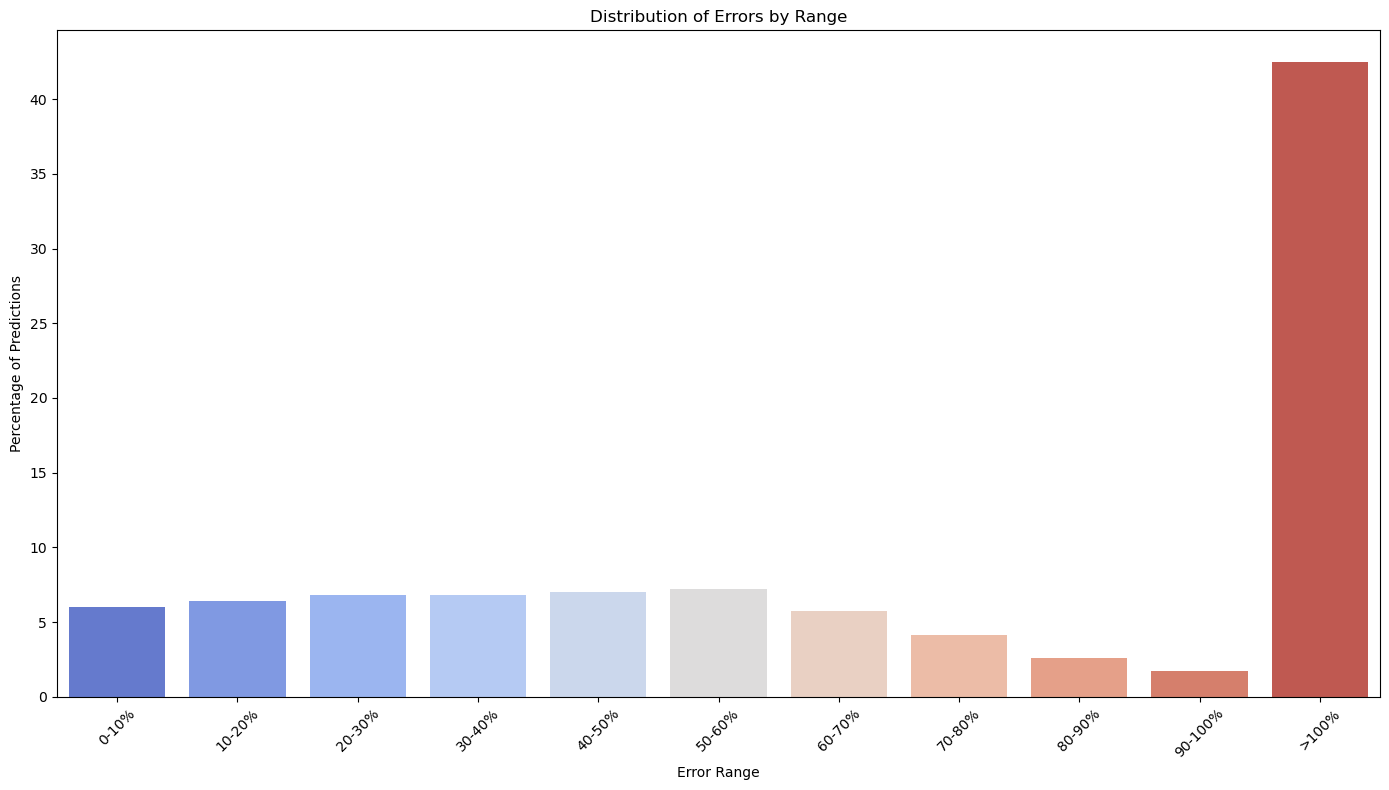

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate absolute errors
absolute_errors = np.abs(y_pred - y_test.values)

# Define error ranges
error_ranges = [
    "0-10%", "10-20%", "20-30%", "30-40%", "40-50%", 
    "50-60%", "60-70%", "70-80%", "80-90%", "90-100%", ">100%"
]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]

# Assign errors to ranges
error_categories = pd.cut((absolute_errors / y_test.values) * 100, bins=bins, labels=error_ranges)

# Create a DataFrame for the error distribution
error_distribution = error_categories.value_counts().sort_index()

# Print the distribution as a table
error_table = pd.DataFrame({
    "Error Range": error_distribution.index,
    "Count": error_distribution.values,
    "Percentage": (error_distribution.values / len(y_test)) * 100
})
print("\nError Distribution Table:")
print(error_table)

# Plot the distribution of errors
plt.figure(figsize=(14, 8))
sns.barplot(x=error_table["Error Range"], y=error_table["Percentage"], palette='coolwarm')
plt.title('Distribution of Errors by Range')
plt.xlabel('Error Range')
plt.ylabel('Percentage of Predictions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Training the model with selected features...
[0]	validation_0-rmse:40.56449	validation_1-rmse:40.49476
[1]	validation_0-rmse:40.12054	validation_1-rmse:40.05739
[2]	validation_0-rmse:39.73734	validation_1-rmse:39.68150
[3]	validation_0-rmse:39.40683	validation_1-rmse:39.35812
[4]	validation_0-rmse:39.13667	validation_1-rmse:39.09223
[5]	validation_0-rmse:38.91176	validation_1-rmse:38.87636
[6]	validation_0-rmse:38.72180	validation_1-rmse:38.68912
[7]	validation_0-rmse:38.57046	validation_1-rmse:38.54386
[8]	validation_0-rmse:38.44352	validation_1-rmse:38.42332
[9]	validation_0-rmse:38.33624	validation_1-rmse:38.32294
[10]	validation_0-rmse:38.24136	validation_1-rmse:38.23183
[11]	validation_0-rmse:38.16346	validation_1-rmse:38.15658
[12]	validation_0-rmse:38.09960	validation_1-rmse:38.09564
[13]	validation_0-rmse:38.04621	validation_1-rmse:38.04678
[14]	validation_0-rmse:37.99661	validation_1-rmse:38.00035
[15]	validation_0-rmse:37.95593	validation_1-rmse:37.96424
[16]	validation_0-rms

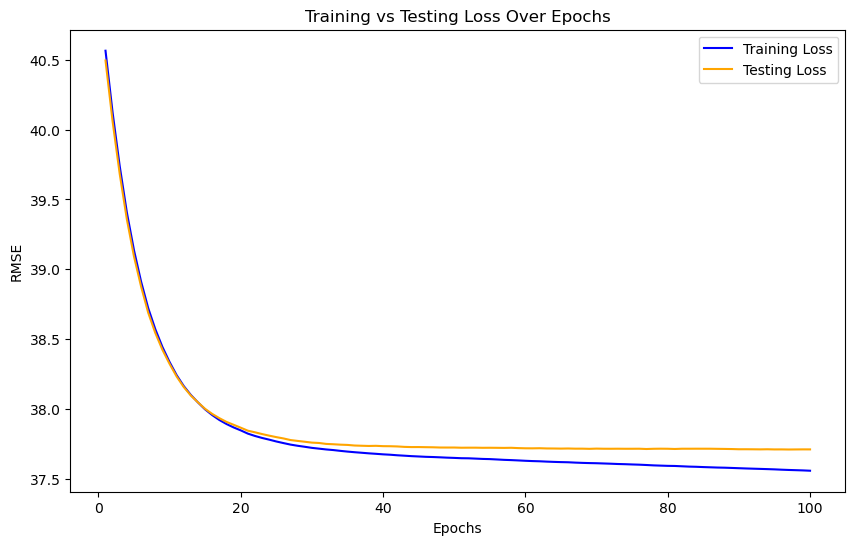


Error Distribution Table:
   Error Range  Count  Percentage
0        0-10%   1330    5.886519
1       10-20%   1462    6.470744
2       20-30%   1548    6.851376
3       30-40%   1572    6.957599
4       40-50%   1578    6.984155
5       50-60%   1585    7.015137
6       60-70%   1324    5.859963
7       70-80%    941    4.164823
8       80-90%    601    2.659998
9      90-100%    395    1.748252
10       >100%   9562   42.320970


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/1908484769.py:103: RuntimeWarning: divide by zero encountered in divide
  error_categories = pd.cut((absolute_errors / y_test.values) * 100, bins=bins, labels=error_ranges)


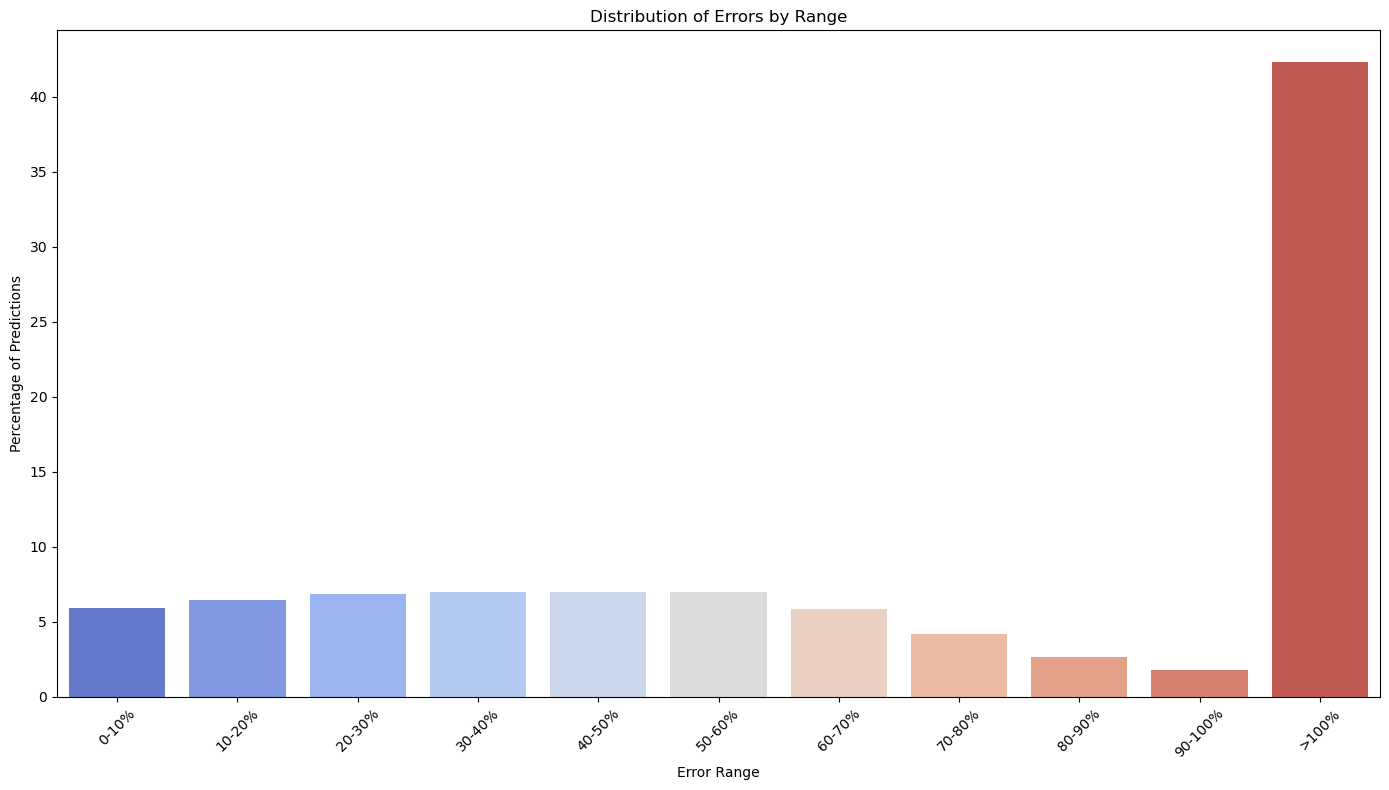

Predicted values saved to 'predicted_fantasy_points_selected_features.csv'


/var/folders/fc/m5qlqlv518x0v2g6w7wjsh1w0000gn/T/ipykernel_29241/1908484769.py:132: RuntimeWarning: divide by zero encountered in divide
  'Percentage_Error': np.abs((y_test.values - y_pred) / y_test.values) * 100  # Raw percentage error


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import seaborn as sns

# Define selected input features based on importance
selected_features = [
    'batsman_total_runs', 'recent_total_runs_odi', 'batsman_strike_rate',
    'recent_economy_rate_odi', 'bowler_economy_rate', 'batsman_100s',
    'bowler_wickets', 'batsman_50s', 'recent_total_wickets_odi',
    'batsman_average_runs_per_match'
]



# Define the target variable
target_variable = 'fantasy_points_x'

# Drop rows with missing values in selected features or target variable
df = df.dropna(subset=selected_features + [target_variable])

# Define input (X) and target (y)
X = df[selected_features]
y = df[target_variable]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor with the best parameters
best_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42,
    eval_metric='rmse'
)

# Train the model
print("Training the model with selected features...")
best_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=True
)

# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print("\nFinal Testing Metrics with Selected Features:")
print(f"Mean Squared Error (MSE): {final_mse}")
print(f"R-squared (R2): {final_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot Training vs Testing Loss
evals_result = best_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Testing Loss', color='orange')
plt.title('Training vs Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Calculate absolute errors
absolute_errors = np.abs(y_pred - y_test.values)

# Define error ranges
error_ranges = [
    "0-10%", "10-20%", "20-30%", "30-40%", "40-50%", 
    "50-60%", "60-70%", "70-80%", "80-90%", "90-100%", ">100%"
]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]

# Assign errors to ranges
error_categories = pd.cut((absolute_errors / y_test.values) * 100, bins=bins, labels=error_ranges)

# Create a DataFrame for the error distribution
error_distribution = error_categories.value_counts().sort_index()

# Print the distribution as a table
error_table = pd.DataFrame({
    "Error Range": error_distribution.index,
    "Count": error_distribution.values,
    "Percentage": (error_distribution.values / len(y_test)) * 100
})
print("\nError Distribution Table:")
print(error_table)

# Plot the distribution of errors
plt.figure(figsize=(14, 8))
sns.barplot(x=error_table["Error Range"], y=error_table["Percentage"], palette='coolwarm')
plt.title('Distribution of Errors by Range')
plt.xlabel('Error Range')
plt.ylabel('Percentage of Predictions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': absolute_errors,
    'Percentage_Error': np.abs((y_test.values - y_pred) / y_test.values) * 100  # Raw percentage error
})
output_file = 'predicted_fantasy_points_selected_features.csv'
output_df.to_csv(output_file, index=False)
print(f"Predicted values saved to '{output_file}'")


In [54]:
print(X_train.describe())
print(y_train.describe())
print(X_train.isnull().sum())  # Ensure no missing values


       batsman_total_runs  recent_total_runs_odi  batsman_strike_rate  \
count        90372.000000           90372.000000         90372.000000   
mean           647.547924              70.992553            60.245326   
std           1269.016389              80.792056            37.622261   
min              0.000000               0.000000             0.000000   
25%              8.000000               2.000000            37.500000   
50%            140.000000              42.000000            71.084337   
75%            664.000000             116.000000            85.366556   
max          13764.000000             596.000000           600.000000   

       recent_economy_rate_odi  bowler_economy_rate  batsman_100s  \
count             90372.000000         90372.000000  90372.000000   
mean                  2.719901             3.144911      0.933873   
std                   2.871440             2.883588      2.847896   
min                   0.000000             0.000000      0.000000 

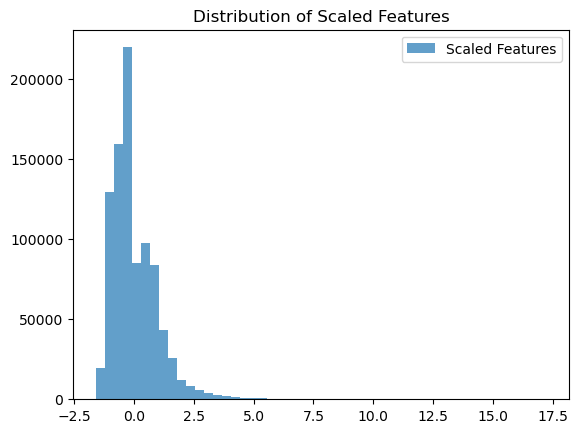

In [55]:
plt.hist(X_train_scaled.flatten(), bins=50, alpha=0.7, label='Scaled Features')
plt.title('Distribution of Scaled Features')
plt.legend()
plt.show()


In [57]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 18.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
merged_df.head()


,match_id,player_id,player_name_x,team_name_x,runs_scored_x,balls_faced_x,no_of_fours_x,no_of_sixes_x,no_of_catches_x,runouts_x,...,batsman_average_runs_per_match,batsman_strike_rate,batsman_total_runs,bowler_average,bowler_economy_rate,bowler_wickets,fielder_total_catches,fielder_total_runouts,total_fours,total_sixes
0,64814,91a4a398,Z Khan,India,11,13,1,0,1,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
1,64814,2764133a,L Vincent,New Zealand,34,32,2,0,0,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
2,64814,b8a55852,BB McCullum,New Zealand,7,12,0,0,4,1,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
3,64814,efc0a862,BF Bowden,NaN,0,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
4,64814,f5390243,CD McMillan,New Zealand,5,7,0,0,1,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0


In [9]:
import pandas as pd
import numpy as np
from pycaret.regression import *

# Load your dataset (use your pre-merged dataframe here)
df = merged_df

# Define selected input features and target variable
selected_features = [
    'batsman_total_runs', 'recent_total_runs_odi', 'batsman_strike_rate',
    'recent_economy_rate_odi', 'bowler_economy_rate', 'batsman_100s',
    'bowler_wickets', 'batsman_50s', 'recent_total_wickets_odi',
    'batsman_average_runs_per_match'
]
target_variable = 'fantasy_points_x'

# Drop rows with missing values
df = df.dropna(subset=selected_features + [target_variable])

# Prepare the data for PyCaret
data = df[selected_features + [target_variable]]
data.columns = selected_features + ['Target']  # Rename target column for PyCaret compatibility

# Initialize the regression experiment
exp = setup(
    data=data,
    target='Target',
    session_id=42,
    normalize=True,  # Standardize features
    verbose=False    # Suppress detailed output
)

# Compare all regression models
compare_results = compare_models(sort='MAE')

# Finalize the best model
best_model = finalize_model(compare_results)

# Predict on the entire dataset to calculate MAPE
predictions = predict_model(best_model, data=data)
predicted = predictions['Label']
actual = predictions['Target']

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = actual != 0  # Avoid division by zero
actual_non_zero = actual[non_zero_indices]
predicted_non_zero = predicted[non_zero_indices]
mape = np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100

# Tabulate the results
results_df = pull()  # Get the comparison results from PyCaret
results_df['MAPE'] = mape  # Add MAPE as a new column
print("\nModel Comparison Results:")
print(results_df)

# Save the results to a CSV file
results_df.to_csv('regression_model_comparison.csv', index=False)
print(f"\nModel comparison results saved to 'regression_model_comparison.csv'.")

# Optional: Plot the feature importance of the best model if it supports it
try:
    plot_model(best_model, plot='feature')
except:
    print("\nFeature importance plot is not available for this model.")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,26.8854,1518.8050,38.9700,0.1032,1.5041,2.3440,0.0790
gbr,Gradient Boosting Regressor,27.6323,1428.1989,37.7902,0.1566,1.5699,3.0129,2.1650
lightgbm,Light Gradient Boosting Machine,27.6817,1432.8613,37.8518,0.1539,1.5704,3.0065,0.4650
xgboost,Extreme Gradient Boosting,27.9446,1473.6272,38.3868,0.1297,1.5685,3.0094,0.1260
ridge,Ridge Regression,28.3121,1455.6511,38.1516,0.1404,1.6599,2.9321,0.0340
lar,Least Angle Regression,28.3121,1455.6512,38.1516,0.1404,1.6599,2.9321,0.0320
lr,Linear Regression,28.3121,1455.6512,38.1516,0.1404,1.6599,2.9321,0.4020
br,Bayesian Ridge,28.3137,1455.6416,38.1515,0.1404,1.6602,2.9320,0.0380
rf,Random Forest Regressor,28.4295,1521.2632,39.0023,0.1016,1.5691,3.0721,6.8830
lasso,Lasso Regression,28.5516,1458.8321,38.1933,0.1385,1.6948,2.9175,0.0530


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,26.8604,1516.3075,38.9398,0.1028,1.5066,2.3541


KeyError: 'Label'

In [10]:
# Predict on the entire dataset to calculate MAPE
predictions = predict_model(best_model, data=data)

# Inspect the predictions DataFrame
print(predictions.head())
print(predictions.columns)

# Correct column names based on the output
# If "Label" doesn't exist, adjust to the actual column name for predictions
predicted = predictions['Label'] if 'Label' in predictions.columns else predictions['Score']
actual = predictions['Target']

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = actual != 0  # Avoid division by zero
actual_non_zero = actual[non_zero_indices]
predicted_non_zero = predicted[non_zero_indices]
mape = np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,26.8604,1516.3075,38.9398,0.1028,1.5066,2.3541


   batsman_total_runs  recent_total_runs_odi  batsman_strike_rate  \
0                   0                      0                  0.0   
1                   0                      0                  0.0   
2                   0                      0                  0.0   
3                   0                      0                  0.0   
4                   0                      0                  0.0   

   recent_economy_rate_odi  bowler_economy_rate  batsman_100s  bowler_wickets  \
0                      0.0                  0.0             0               0   
1                      0.0                  0.0             0               0   
2                      0.0                  0.0             0               0   
3                      0.0                  0.0             0               0   
4                      0.0                  0.0             0               0   

   batsman_50s  recent_total_wickets_odi  batsman_average_runs_per_match  \
0            0        

KeyError: 'Score'

In [11]:
df.head()

,match_id,player_id,player_name_x,team_name_x,runs_scored_x,balls_faced_x,no_of_fours_x,no_of_sixes_x,no_of_catches_x,runouts_x,...,batsman_average_runs_per_match,batsman_strike_rate,batsman_total_runs,bowler_average,bowler_economy_rate,bowler_wickets,fielder_total_catches,fielder_total_runouts,total_fours,total_sixes
0,64814,91a4a398,Z Khan,India,11,13,1,0,1,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
1,64814,2764133a,L Vincent,New Zealand,34,32,2,0,0,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
2,64814,b8a55852,BB McCullum,New Zealand,7,12,0,0,4,1,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
3,64814,efc0a862,BF Bowden,NaN,0,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0
4,64814,f5390243,CD McMillan,New Zealand,5,7,0,0,1,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0,0


In [12]:
df.tail()

,match_id,player_id,player_name_x,team_name_x,runs_scored_x,balls_faced_x,no_of_fours_x,no_of_sixes_x,no_of_catches_x,runouts_x,...,batsman_average_runs_per_match,batsman_strike_rate,batsman_total_runs,bowler_average,bowler_economy_rate,bowler_wickets,fielder_total_catches,fielder_total_runouts,total_fours,total_sixes
112961,1451902,c1a1acf3,S Wadvalla,NaN,0,0,0,0,0,0,...,0.0,0.000000,0,0.00,0.000000,0,0,0,0,0
112962,1451903,19c56e6e,AJ Mosca,Italy,0,5,0,0,0,0,...,53.0,92.982456,265,48.00,9.600000,1,4,1,22,4
112963,1451902,b2dadc51,II Selemani,Tanzania,59,45,6,2,0,0,...,15.0,100.000000,45,0.00,0.000000,0,0,0,1,5
112964,1451903,0e56c514,HJ Manenti,Italy,26,41,1,0,0,0,...,47.5,98.958333,190,27.25,6.055556,8,3,0,17,4
112965,1451902,63d6f031,AP Rajeevan,Tanzania,0,0,0,0,0,0,...,8.0,36.923077,24,0.00,0.000000,0,1,0,1,0


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22594 entries, 12580 to 52061
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   batsman_total_runs              22594 non-null  int64  
 1   recent_total_runs_odi           22594 non-null  int64  
 2   batsman_strike_rate             22594 non-null  float64
 3   recent_economy_rate_odi         22594 non-null  float64
 4   bowler_economy_rate             22594 non-null  float64
 5   batsman_100s                    22594 non-null  int64  
 6   bowler_wickets                  22594 non-null  int64  
 7   batsman_50s                     22594 non-null  int64  
 8   recent_total_wickets_odi        22594 non-null  int64  
 9   batsman_average_runs_per_match  22594 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.9 MB


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error





# Define selected input features and target variable
selected_features = [
    'batsman_total_runs', 'recent_total_runs_odi', 'batsman_strike_rate',
    'recent_economy_rate_odi', 'bowler_economy_rate', 'batsman_100s',
    'bowler_wickets', 'batsman_50s', 'recent_total_wickets_odi',
    'batsman_average_runs_per_match'
]
target_variable = 'fantasy_points_x'

# Drop rows with missing values
df = df.dropna(subset=selected_features + [target_variable])

# Define input (X) and target (y)
X = df[selected_features]
y = df[target_variable]

# Split into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Huber Regressor
huber = HuberRegressor()

# Train the model on the entire dataset
print("Training Huber Regression on the entire dataset...")
huber.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = huber.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print("\nHuber Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'Input_Features': list(X_test.index),  # Feature row indices for identification
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': np.abs(y_pred - y_test.values),
    'Percentage_Error': np.abs((y_pred - y_test.values) / y_test.values) * 100  # Percentage error
})

output_file = 'huber_regression_predictions.csv'
output_df.to_csv(output_file, index=False)
print(f"Predictions saved to '{output_file}'")


Training Huber Regression on the entire dataset...

Huber Regression Results:
Mean Squared Error (MSE): 1511.81
R-squared (R2): 0.10
Mean Absolute Error (MAE): 26.77
Mean Absolute Percentage Error (MAPE): 240.22%
Predictions saved to 'huber_regression_predictions.csv'


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define selected input features and target variable
selected_features = [
    'batsman_total_runs', 'recent_total_runs_odi', 'batsman_strike_rate',
    'recent_economy_rate_odi', 'bowler_economy_rate', 'batsman_100s',
    'bowler_wickets', 'batsman_50s', 'recent_total_wickets_odi',
    'batsman_average_runs_per_match'
]
target_variable = 'fantasy_points_x'

# Drop rows with missing values
df = df.dropna(subset=selected_features + [target_variable])

# Retain match_id and player_id for output
identifier_columns = ['match_id', 'player_id']

# Ensure these columns exist
if not all(col in df.columns for col in identifier_columns):
    raise ValueError(f"The following columns must exist in the DataFrame: {identifier_columns}")

# Define input (X) and target (y)
X = df[selected_features + identifier_columns]  # Include match_id and player_id for later use
y = df[target_variable]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retain match_id and player_id for output
X_test_identifiers = X_test[identifier_columns]

# Standardize the data (excluding identifier columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Initialize Huber Regressor
huber = HuberRegressor()

# Train the model on the entire dataset
print("Training Huber Regression on the entire dataset...")
huber.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = huber.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)

# Print evaluation metrics
print("\nHuber Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'match_id': X_test_identifiers['match_id'],
    'player_id': X_test_identifiers['player_id'],
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': np.abs(y_pred - y_test.values),
    'Percentage_Error': np.abs((y_pred - y_test.values) / y_test.values) * 100  # Percentage error
})

output_file = 'huber_regression_predictions_with_ids.csv'
output_df.to_csv(output_file, index=False)
print(f"Predictions saved to '{output_file}'")


Training Huber Regression on the entire dataset...

Huber Regression Results:
Mean Squared Error (MSE): 1511.81
R-squared (R2): 0.10
Mean Absolute Error (MAE): 26.77
Mean Absolute Percentage Error (MAPE): 240.22%
Predictions saved to 'huber_regression_predictions_with_ids.csv'


In [17]:
import pandas as pd

# File path
output_file = 'huber_regression_predictions_with_ids.csv'

# Open the file
df_sorted = pd.read_csv(output_file)

# Sort by match_id
df_sorted = df_sorted.sort_values(by='match_id')

# Display the sorted DataFrame
print(df_sorted.head())

# Save the sorted file (optional)
sorted_file = 'sorted_huber_regression_predictions_with_ids.csv'
df_sorted.to_csv(sorted_file, index=False)
print(f"Sorted predictions saved to '{sorted_file}'")


      match_id player_id  Actual_Fantasy_Points  Predicted_Fantasy_Points  \
9239   1000887  2911de16                     86                 35.256517   
3082   1000889  12b610c2                     30                 42.148853   
17666  1000889  8a75e999                     39                 41.853574   
15485  1000889  193ef196                     41                 30.715658   
11880  1000889  d5ac41d8                      0                  6.567724   

       Absolute_Error  Percentage_Error  
9239        50.743483         59.004050  
3082        12.148853         40.496175  
17666        2.853574          7.316857  
15485       10.284342         25.083761  
11880        6.567724               inf  
Sorted predictions saved to 'sorted_huber_regression_predictions_with_ids.csv'


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define selected input features and target variable
selected_features = [
    'batsman_total_runs', 'recent_total_runs_odi', 'batsman_strike_rate',
    'recent_economy_rate_odi', 'bowler_economy_rate', 'batsman_100s',
    'bowler_wickets', 'batsman_50s', 'recent_total_wickets_odi',
    'batsman_average_runs_per_match'
]
target_variable = 'fantasy_points_x'

# Drop rows with missing values
df = df.dropna(subset=selected_features + [target_variable])

# Retain match_id and player_id for output
identifier_columns = ['match_id', 'player_id']

# Ensure these columns exist
if not all(col in df.columns for col in identifier_columns):
    raise ValueError(f"The following columns must exist in the DataFrame: {identifier_columns}")

# Define input (X) and target (y)
X = df[selected_features + identifier_columns]  # Include match_id and player_id for later use
y = df[target_variable]

# Sequential split (80% for training, 20% for testing)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Retain match_id and player_id for output
X_test_identifiers = X_test[identifier_columns].reset_index(drop=True)

# Standardize the data (excluding identifier columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Initialize Huber Regressor
huber = HuberRegressor()

# Train the model on the entire dataset
print("Training Huber Regression on the sequential split dataset...")
huber.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = huber.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)


# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_indices = y_test.values != 0  # Avoid division by zero
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]
percentage_errors = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) * 100
mape = np.mean(percentage_errors)


# Print evaluation metrics
print("\nHuber Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'match_id': X_test_identifiers['match_id'],
    'player_id': X_test_identifiers['player_id'],
    'Actual_Fantasy_Points': y_test.values,
    'Predicted_Fantasy_Points': y_pred,
    'Absolute_Error': np.abs(y_pred - y_test.values),
    'Percentage_Error': np.abs((y_pred - y_test.values) / y_test.values) * 100  # Percentage error
}).reset_index(drop=True)

# Sort output by match_id


# Save the sorted predictions
output_file = 'huber_regression_predictions_sorted.csv'
output_df.to_csv(output_file, index=False)
print(f"Sorted predictions saved to '{output_file}'")


Training Huber Regression on the sequential split dataset...

Huber Regression Results:
Mean Squared Error (MSE): 1595.23
R-squared (R2): 0.11
Mean Absolute Error (MAE): 27.51
Mean Absolute Percentage Error (MAPE): 235.06%
Sorted predictions saved to 'huber_regression_predictions_sorted.csv'


In [23]:
# Group values by match_id and calculate summary statistics
grouped_output = output_df.groupby('match_id').agg({
    'Actual_Fantasy_Points': ['mean', 'sum', 'min', 'max'],  # Summary for actual points
    'Predicted_Fantasy_Points': ['mean', 'sum', 'min', 'max'],  # Summary for predicted points
    'Absolute_Error': ['mean', 'sum'],  # Summary for absolute error
    'Percentage_Error': ['mean', 'max'],  # Summary for percentage error
})

# Calculate Percentage Error in Total Points
grouped_output['Total_Points_Percentage_Error'] = (
    (grouped_output[('Predicted_Fantasy_Points', 'sum')] - grouped_output[('Actual_Fantasy_Points', 'sum')]).abs()
    / grouped_output[('Actual_Fantasy_Points', 'sum')]
) * 100

# Flatten multi-level columns for better readability
grouped_output.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in grouped_output.columns]
grouped_output = grouped_output.reset_index()

# Save the grouped values to a new CSV file
grouped_file = 'grouped_huber_regression_predictions_with_percentage_error.csv'
grouped_output.to_csv(grouped_file, index=False)
print(f"Grouped values by match_id saved to '{grouped_file}'")


Grouped values by match_id saved to 'grouped_huber_regression_predictions_with_percentage_error.csv'


In [24]:
# Calculate Percentage Error in Total Points
grouped_output['Total_Points_Percentage_Error'] = (
    (grouped_output['Predicted_Fantasy_Points_sum'] - grouped_output['Actual_Fantasy_Points_sum']).abs()
    / grouped_output['Actual_Fantasy_Points_sum']
) * 100

# Calculate the average percentage error
average_team_percentage_error = grouped_output['Total_Points_Percentage_Error'].mean()

# Print the result
print(f"\nAverage Percentage Error in Total Fantasy Points of a Team: {average_team_percentage_error:.2f}%")



Average Percentage Error in Total Fantasy Points of a Team: 35.41%
